<a href="https://colab.research.google.com/github/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/blob/main/An%C3%A1lisis%20exploratorio%20y%20modelado%20predictivo%20de%20precios%20de%20viviendas%20en%20Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  **Extracción y preparación de datos**

### **Uso de SQL y Python:**

Extraer los datos de precios de viviendas desde el portal Fotocasa. Se requiere que los datos sean almacenados en una base de datos y manipulados usando SQL para su posterior análisis.

**CONCLUSION**

Consideramos que no es necerario realizar ninguna acción en este punto puesto que ya existe el Dataset que ha sido extraido de la web de Fotocasa

### **Formulación del problema de negocio:**

El equipo debe definir claramente el problema de predicción, identificando las variables relevantes como la ubicación (código postal o coordenadas), tamaño del inmueble, número de habitaciones, antigüedad, entre otras.

**CONCLUSION**

Pensamos que el problema de prediccion viene determinado por el propio proyecto y que no precisa de mayor  precisíon. En cuanto a la identificación de las variables relevantes, consideramos que debido a la poca información que posee cada  registro todas las variables pueden ser de utilidad o bien para el EDA o bien para el modelado predictivo.

###**Preparación del dataset**

A través de Python y SQL, se debe limpiar y transformar el dataset para eliminar inconsistencias, manejar valores nulos y realizar una correcta codificación de las variables categóricas.

Los pasos que vamos a seguir para preparar nuestro Dataset van a ser los siguientes

- **EDA Básico a origen y Revisar Datos Faltantes**:

- **Verificar Valores Inconsistentes**:
   
- **Normalización de Datos**:
   
- **Eliminación de Duplicados**:
   
- **Manejo de los Outliers**:
   
- **Validación de Categorías Booleanas**:
   
- **Conversión de Tipos de Datos**:

Otros aspectos que consideraremos antes y despues de la preparación del Dataset son:

**PREVIO A LA PREPARACION**

**Establecimiento de Estructura del DataSet**:
   - Dicha estructura ha quedado definida durante la formulación del problema de negocio que a su vez viene determinada por el propio proyecto, tal como se explica en puntos anteriores.

**POSTERIOR A LA PREPARACION**

**Documentación de Cambios**:
   - Mantendremos un registro de todas las modificaciones realizadas al dataset para conseguir transparencia y facilitar auditorías o revisiones.

**PREVIO Y POSTERIOR A LA PREPARACION**

**Visualización Inicial y Final**:
    - Visualizaremos el dataset antes y después de la limpieza para entender el impacto de los cambios.

#### *EDA Basico a origen y Revisar Datos Nulos*

   - Identificación campos vacíos o nulos.
   - Decisión de imitar, eliminar o completar esos datos según su importancia.

        FASE DE EDA BASICA A ORIGEN

In [99]:
#Importar librerias y DataSet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/main/Barcelona_Fotocasa_HousingPrices.csv'
df = pd.read_csv(url)

In [100]:
#Listar los campos del Dataset
df.columns.tolist()

['Unnamed: 0',
 'price',
 'rooms',
 'bathroom',
 'lift',
 'terrace',
 'square_meters',
 'real_state',
 'neighborhood',
 'square_meters_price']

In [101]:
#Listar informacion del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [102]:
# Descripción estadística básica
display(df.describe())

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000
mean,4093.500000,1444.092574,2.420738,1.508793,84.610161,17.739121
std,2363.816335,1125.886215,1.138592,0.732798,47.874028,9.245241
min,0.000000,320.000000,0.000000,1.000000,10.000000,4.910714
25%,2046.750000,875.000000,2.000000,1.000000,56.000000,12.790698
50%,4093.500000,1100.000000,2.000000,1.000000,73.000000,15.306122
75%,6140.250000,1540.000000,3.000000,2.000000,95.000000,19.444444
max,8187.000000,15000.000000,10.000000,8.000000,679.000000,186.666667


        FASE DE REVISION DE DATOS FALTANTES

In [103]:
#Identificación campos vacíos o nulos.

valores_faltantes = df.isnull().sum()

# Porcentaje de valores faltantes
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Porcentaje (%)': porcentaje_faltantes.apply(lambda x: "{:.2f}%".format(x))
})
display(missing_info)

,Valores Faltantes,Porcentaje (%)
Unnamed: 0,0,0.00%
price,0,0.00%
rooms,0,0.00%
bathroom,0,0.00%
lift,0,0.00%
terrace,0,0.00%
square_meters,0,0.00%
real_state,268,3.27%
neighborhood,0,0.00%
square_meters_price,0,0.00%


Tras el testeo se observan 268 registros con valores nulos en el campo real_state y aunque el porcentaje de valores nulos sobre el total es bajo ( menor del 5%), validaremos si esta distribuido de manera  equilibrada entre barrios o si hay barrios en los que afecte mas de un 5% y la afectación se pueda considerar moderada o alta.

In [104]:
# Codigos para decidir si imitar, eliminar o completar los datos NaN del campo real_state.

# Agrupar por barrio y contar los valores nulos en 'real_state'
null_counts_by_neighborhood = df.groupby('neighborhood')['real_state'].apply(lambda x: x.isnull().sum())

# Calcular el total de unidades por barrio
total_units_by_neighborhood = df['neighborhood'].value_counts()

# Crear un DataFrame con la información del porcentaje
percentage_info = pd.DataFrame({
    'Porcentaje de NaN sobre el total de unidades (%)': (null_counts_by_neighborhood / total_units_by_neighborhood * 100).apply(lambda x: "{:.2f}%".format(x))
}, index=null_counts_by_neighborhood.index)

# Ordenar el DataFrame por el porcentaje
percentage_info = percentage_info.sort_values(by='Porcentaje de NaN sobre el total de unidades (%)', ascending=False)

# Imprimir la información por pantalla
display(percentage_info)


,Porcentaje de NaN sobre el total de unidades (%)
neighborhood,
Sarria-Sant Gervasi,5.44%
Gràcia,4.36%
Sant Martí,4.05%
Ciutat Vella,3.74%
Horta- Guinardo,3.17%
Sants-Montjuïc,3.05%
Les Corts,2.29%
Sant Andreu,2.25%
Eixample,1.71%


Los valores  nulos estan repartidos de un modo bastante equilibrado entre barrios y afecta de un modo minimo y similar a todos los barrios, aunque en Sarria-Sant Gervasi afecta sobre el total de manera moderada

CONCLUSION

Dado que el peso que tienen los valores NaN sobre el total del Dataset es bajo y sobre cada barrio tambien podemos considerarlo bajo, optaremos por eliminar los registros aunque a modo de test crearemos un nuevo fichero con los registros eliminados al que le daremos el valor de tipo de vivienda al campo que contiene el NaN tras aplicar una media de la superficie del tipo de viviendas por cada barrio. De este modo podemos disponer de la totalidad de datos en dos bases de datos por si fuese necesario recurrir a esos datos mas adelante.

In [105]:
#Implementación de la CONCLUSION

# Cálculo de la mediana de metros cuadrados para cada tipo de vivienda en cada barrio
median_square_meters = df.groupby(['neighborhood', 'real_state'])['square_meters'].median().reset_index()

# Renombrar columna para evitar conflictos
median_square_meters.rename(columns={'square_meters': 'median_square_meters'}, inplace=True)

# Función para encontrar el tipo de vivienda más cercano basado en el valor medio de metros cuadrados
def find_closest_real_state(row):
    if pd.isna(row['real_state']):
        # Filtrado del DataFrame de medias para obtener el tipo de vivienda con el valor medio más cercano
        neighborhood_data = median_square_meters[median_square_meters['neighborhood'] == row['neighborhood']]
        closest_real_state = neighborhood_data.iloc[(neighborhood_data['median_square_meters'] - row['square_meters']).abs().argsort()[:1]]['real_state'].values[0]
        return closest_real_state
    else:
        return row['real_state']

# Aplicar función y listar los resultados
df['predicted_real_state'] = df.apply(find_closest_real_state, axis=1)

# Filtrar de los registros con NaN en el campo real_state
result = df[pd.isna(df['real_state'])][['neighborhood', 'square_meters', 'predicted_real_state']]

print(result)

# Guardar exclusivamente los datos de los registros con NaN imputando a estos el valor real_state en base a la mediana de la superficie
# por cada real_state en funcion del barrio en un nuevo archivo CSV
# result.to_csv('ONLY_NaN_to_MEDIAN_Barcelona_Fotocasa_HousingPrices.csv', index=False)

# Eliminar las filas con valores NaN en la columna 'real_state'
df_clean = df.dropna()
print
# Guardar los cambios
#df_clean.to_csv('/content/NaN_OUT_Barcelona_Fotocasa_HousingPrices.csv', index=False)

             neighborhood  square_meters predicted_real_state
16        Horta- Guinardo            129                attic
57    Sarria-Sant Gervasi             85                 flat
63    Sarria-Sant Gervasi             85                 flat
78         Sants-Montjuïc             90                 flat
83           Ciutat Vella             46                study
...                   ...            ...                  ...
8042         Ciutat Vella             53            apartment
8059       Sants-Montjuïc            115                 flat
8113         Ciutat Vella             55            apartment
8120             Eixample             80                 flat
8127               Gràcia             60            apartment

[268 rows x 3 columns]


<function print>

In [106]:
print (df_clean)

      Unnamed: 0  price  rooms  bathroom   lift  terrace  square_meters  \
0              0    750      3         1   True    False             60   
1              1    770      2         1   True    False             59   
2              2   1300      1         1   True     True             30   
3              3   2800      1         1   True     True             70   
4              4    720      2         1   True    False             44   
...          ...    ...    ...       ...    ...      ...            ...   
8183        8183   1075      2         2  False    False             65   
8184        8184   1500      3         2   True    False            110   
8185        8185   1500      2         2   True     True             90   
8186        8186   1500      3         2   True    False            110   
8187        8187   1500      3         2   True    False            110   

     real_state         neighborhood  square_meters_price predicted_real_state  
0          flat   

#### *Verificar Valores Inconsistentes*:

- Nos aseguraremos de que los rangos de superficie, precio, baños y habitaciones sean razonables.
- Por ejemplo, que el precio no sea negativo o que la superficie tenga una cifra lógica en relación con la cantidad de habitaciones.

In [107]:
# Verificar valores inconsistentes
def verificar_inconsistencias(df_clean):
    inconsistencias = {}

    # Verificar precios negativos o cero
    inconsistencias['precio_cero_negativo'] = df_clean[df_clean['price'] <= 0]

    # Verificar superficies negativas o cero
    inconsistencias['superficie_cero_negativa'] = df_clean[df_clean['square_meters'] <= 0]

    # Verificar baños negativos o cero
    inconsistencias['baños_cero_negativos'] = df_clean[df_clean['bathroom'] <= 0]

    # Verificar habitaciones negativas o cero
    inconsistencias['habitaciones_cero_negativas'] = df_clean[df_clean['rooms'] <= 0]

    # Verificar relación superficie-habitaciones
    inconsistencias['superficie_habitaciones'] = df_clean[df_clean['square_meters'] / df_clean['rooms'] < 10]
    return inconsistencias

# Llamar a la función y mostrar las inconsistencias
inconsistencias = verificar_inconsistencias(df_clean)
for key, value in inconsistencias.items():
    print(f"{key}: \n{value}\n")

precio_cero_negativo: 
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price, predicted_real_state]
Index: []

superficie_cero_negativa: 
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price, predicted_real_state]
Index: []

baños_cero_negativos: 
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price, predicted_real_state]
Index: []

habitaciones_cero_negativas: 
      Unnamed: 0  price  rooms  bathroom   lift  terrace  square_meters  \
138          138    650      0         1   True    False             28   
472          472   1900      0         3   True     True            145   
671          671    635      0         1  False    False             37   
675          675    795      0         1   True    False             34   
686   

De la verificación de valores inconsistentes considerando como tal un valor igual o menor a cero y la relación entre habitaciones y superficie, concluimos lo siguiente:



*   No existen valores inconsistentes en ningún registro de la tabla para los campos precio, superficie y nº de baños.
*   Existen 152 registros afectados por insoncistencias para el campo habitaciones donde el valor es cero o inferior. **Hay que explorar con mas profundidad esta anomalia para determinar que hacer con los datos**
*   En la relación entre superficie y habitaciones existen dos registros afectados, donde el numero de habitaciones en relación con la superficie no se corresponde. **Dado que la afectación sobre el total de datos es practicamente nula optaremos por eliminar esos dos registros.**

In [108]:
# Estudio en profundidad de la inconsistencia de datos localizada para 152 registros de la BBDD
# en relación con el numero de habitaciones

inconsistent_rooms_df = inconsistencias['habitaciones_cero_negativas']

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
display(inconsistent_rooms_df[['rooms', 'square_meters', 'price']].describe())

# Función para agrupar y contar registros inconsistentes
def count_inconsistent_records(df_clean, group_by_column):
    counts = df_clean.groupby(group_by_column)[group_by_column].count()
    info = pd.DataFrame({'Total de registros inconsistentes': counts}, index=counts.index)
    return info.sort_values(by='Total de registros inconsistentes', ascending=True)

# Agrupar por barrio y por tipo de vivienda
inconsistent_info_neighborhood = count_inconsistent_records(inconsistent_rooms_df, 'neighborhood')
inconsistent_info_real_state = count_inconsistent_records(inconsistent_rooms_df, 'real_state')

# Imprimir la información por pantalla
print("\n")
display(inconsistent_info_neighborhood)
print("\n")
display(inconsistent_info_real_state)

# Crear una tabla de contingencia para los registros inconsistentes
inconsistent_matrix = pd.crosstab(inconsistent_rooms_df['neighborhood'], inconsistent_rooms_df['real_state'], margins=True, margins_name="Total")

# Imprimir la matriz por pantalla
print("\n", 'Matriz de  contingencia entre tipo de vivienda y barrio para valores inconsistentes')
print("\n")
display(inconsistent_matrix)


Estadísticas descriptivas:


,rooms,square_meters,price
count,152.0,152.000000,152.000000
mean,0.0,59.625000,983.276316
std,0.0,70.100383,1098.705416
min,0.0,15.000000,423.000000
25%,0.0,30.000000,599.750000
50%,0.0,40.000000,725.000000
75%,0.0,58.000000,892.500000
max,0.0,679.000000,10750.000000


,Total de registros inconsistentes
neighborhood,
Sant Andreu,3
Nou Barris,4
Sant Martí,5
Horta- Guinardo,6
Les Corts,9
Sants-Montjuïc,12
Gràcia,16
Sarria-Sant Gervasi,24
Eixample,30


,Total de registros inconsistentes
real_state,
attic,10
apartment,22
study,51
flat,69



 Matriz de  contingencia entre tipo de vivienda y barrio para valores inconsistentes




real_state,apartment,attic,flat,study,Total
neighborhood,,,,,
Ciutat Vella,8,2,20,13,43
Eixample,8,2,15,5,30
Gràcia,2,1,5,8,16
Horta- Guinardo,0,0,2,4,6
Les Corts,2,2,3,2,9
Nou Barris,0,1,3,0,4
Sant Andreu,0,0,1,2,3
Sant Martí,0,0,2,3,5
Sants-Montjuïc,0,2,5,5,12


Del estudio estadistico, los listados agrupados por tipo de vivienda o por barrio e incluso de la matriz de contingencia aplicadas todas estas soluciones sobre los datos inconsistentes, no se aprecia una clara implicación de estos en futuras acciones que podamos realizar con ellos y por tanto sigue sin ser posible decidir que hacer con estos registros inconsistentes con valor cero o inferior en el campo rooms.

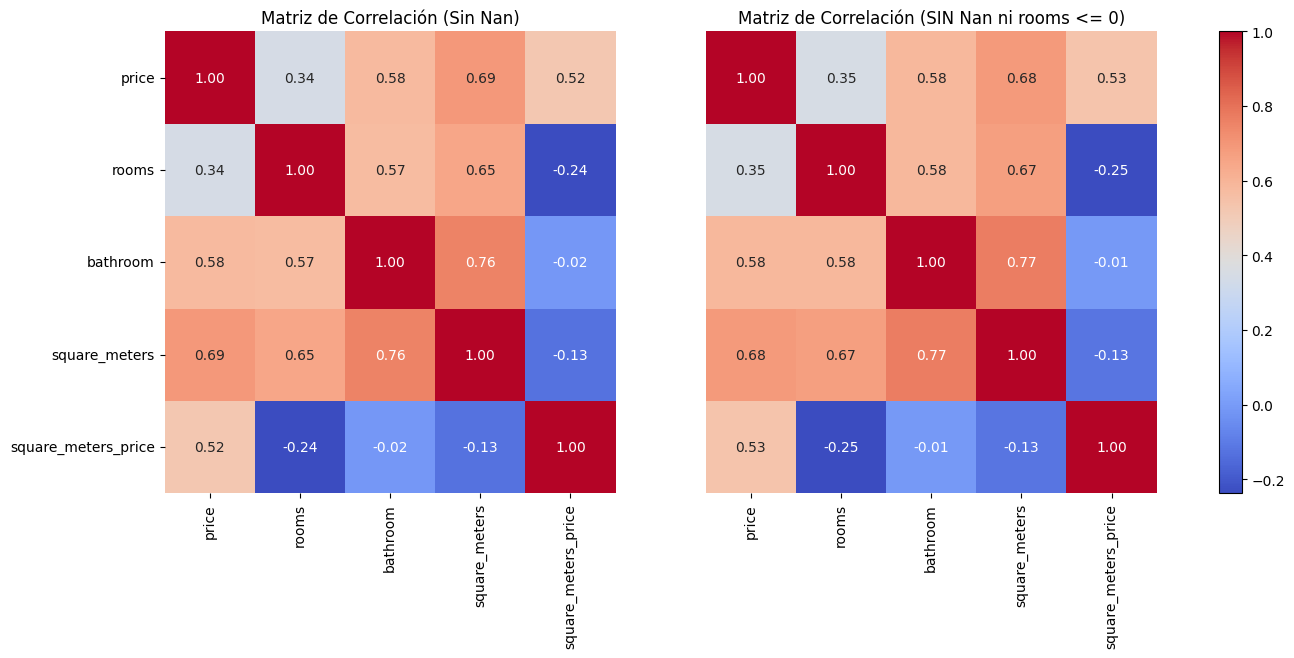

In [109]:
#Matriz de correlación considerando todos los valores y solo los que tienen mas de cero habitaciones

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df_clean.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df_clean[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
filtered_df = df_clean[df_clean['rooms'] > 0]
correlation_matrix_filtered = filtered_df[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Sin Nan)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (SIN Nan ni rooms <= 0)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

Con esta prueba de validación de los datos se observa que la incidendencia en la correlación manteniendo o excluyendo los registros en practicamente nula en muchas de las variables y baja en otras, con lo que podriamos decidir eliminar estos registros inconsistentes. Sin embargo haremos un último test para no desestimar aquellos registros que segun el tipo de propiedad mantengan un equilibrio adecuado con el resto de variables. Vamos a estudiar los tipos de propiedad de estudio y apartamento pues entendemos que son las mas proclives a tener una posible distribución sin habitaciones

In [110]:
pd.set_option("display.max_rows", None)
filtered_df_clean = df_clean[(df_clean['rooms'] <= 0) & (df['real_state'].isin(['study', 'apartment']))]
# Sort the filtered DataFrame by 'real_state'
sorted_df_clean = filtered_df_clean.sort_values(by=['real_state'])
# Select only the desired columns and print the results
result_df_clean = sorted_df_clean[['neighborhood', 'real_state', 'price', 'square_meters', 'rooms', 'bathroom']]
display(result_df_clean)
pd.reset_option("display.max_rows")

<ipython-input-110-be943f473545>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_clean = df_clean[(df_clean['rooms'] <= 0) & (df['real_state'].isin(['study', 'apartment']))]


,neighborhood,real_state,price,square_meters,rooms,bathroom
138,Ciutat Vella,apartment,650,28,0,1
7464,Eixample,apartment,765,33,0,1
6761,Eixample,apartment,785,30,0,1
6583,Les Corts,apartment,725,29,0,1
6462,Eixample,apartment,650,25,0,1
5166,Gràcia,apartment,750,35,0,1
5128,Gràcia,apartment,700,35,0,1
5025,Ciutat Vella,apartment,700,41,0,1
4887,Sarria-Sant Gervasi,apartment,750,40,0,1
4716,Sarria-Sant Gervasi,apartment,3390,300,0,3


Tras la elaboración de este listado filtrado por tipo de propiedad y centrados en las dos tipologias antes mencionadas, se observan una serie de outliers que consideramos que podrian ser eliminados para evitar dentro de esos grupos distorsiones. Concretamente son aquellos registros que poseen una superficie claramente por encima de la media y que en total ascienden a 4 registros. Dado el infimo numero de registros a eliminar no hace falta plotear un grafico.

CONCLUSION

Tras todas la pruebas realizadas decidimos eliminar todos los registros que siendo estudios o apartamentos y teniendo cero o menos dormitorios, poseen una superficie claramente por encima del resto. Tambien decidimos eliminar el resto de registros que no tienen dormitorios y que no son ni estudios ni apartamentos

In [111]:
#Implementación de la CONCLUSION

# Aislar 4 outliers apartamento o estudio fuera de rango dentro del tipo
outliers_cleaned_1 = filtered_df_clean.nlargest(4, 'square_meters')

# Aislar outliers que no son ni apartamento ni estudio
outliers_cleaned_2 = inconsistent_rooms_df[~inconsistent_rooms_df['real_state'].isin(['study', 'apartment'])]

# Eliminar las filas del DataFrame df_clean
outliers_todos = pd.concat([outliers_cleaned_1, outliers_cleaned_2])
indices_a_eliminar = outliers_todos.index
df_clean_1 = df_clean.drop(indices_a_eliminar)

#### *Normalización de datos*

- Unificaremos formatos en caso necesario (por ejemplo, convertir los precios a una sola moneda o utilizar la misma unidad para la superficie).
- Para las categorías barrio y tipo de propiedad, nos aseguraremos de que no haya variaciones en la escritura (p. ej., "Eixample" contra "eixample").

In [112]:
# Verificar barrios únicos
unique_neighborhoods = df_clean_1['neighborhood'].str.lower().str.strip().unique()
print("Barrios únicos:", unique_neighborhoods)

# Verificar tipos de propiedad únicos
unique_real_states = df_clean_1['real_state'].str.lower().str.strip().unique()
print("Tipos de propiedad únicos:", unique_real_states)

Barrios únicos: ['horta- guinardo' 'sant andreu' 'gràcia' 'ciutat vella'
 'sarria-sant gervasi' 'les corts' 'sant martí' 'eixample'
 'sants-montjuïc' 'nou barris']
Tipos de propiedad únicos: ['flat' 'attic' 'apartment' 'study']



No hay que unificar formatos de moneda o superficie porque todos los registros entendemos que estan expresados en euros y metros cuadrados respectivamente. Tampoco tenemos opción de saberlo porque no poseemos la fuente primaria de los datos.(El acceso a la web sobre la que hicieron el scrapping). En cualquier caso damos por validos el formato porque en esa web lo común y tradicional es usar esos formatos para los datos.
            
Para las categorías barrio y tipo de propiedad, nos aseguramos que no hay variaciones en la escritura (p. ej., "Eixample" contra "eixample").

CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación para la normalización de datos en este Dataframe

#### *Eliminación de Duplicados*
    

- Buscaremos entradas duplicadas que puedan distorsionar el análisis.

In [113]:
def find_exact_duplicates(df_clean_1):
    # Crear una columna temporal que combine los valores de las columnas especificadas
    df_clean_1['combined'] = df_clean_1.apply(lambda row: '_'.join(row.astype(str)), axis=1)

    # Identificar registros duplicados basados en la columna combinada
    duplicate_mask = df_clean_1.duplicated(subset=['combined'], keep=False)

    # Filtrar el DataFrame para mostrar solo los registros duplicados
    duplicates = df_clean_1[duplicate_mask]

    # Eliminar la columna temporal
    df_clean_1.drop(columns=['combined'], inplace=True)

    return duplicates

# Encontrar duplicados exactos
exact_duplicates = find_exact_duplicates(df_clean_1)
print(exact_duplicates)

Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price, predicted_real_state, combined]
Index: []


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación para la eliminación de  duplicados en este Dataframe

#### *Manejo de los Outliers*:

- Identificaremos valores atípicos que podrían ser errores de entrada (por ejemplo, un precio de alquiler extremadamente alto o bajo) y decidiremos si lo mantenemos, lo corregimos o lo eliminamos.

In [114]:
def find_outliers(df_clean_1, column):
    # Calcular el primer "cuartil" (Q1) y el tercer "cuartil" (Q3)
    Q1 = df_clean_1[column].quantile(0.05)
    Q3 = df_clean_1[column].quantile(0.95)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df_clean_1[(df_clean_1[column] < lower_bound) | (df_clean_1[column] > upper_bound)]

    return outliers

# Encontrar outliers para cada columna
outliers_square_meters = find_outliers(df_clean_1, 'square_meters')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_price = find_outliers(df_clean_1, 'price')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_rooms = find_outliers(df_clean_1, 'rooms')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_bathroom = find_outliers(df_clean_1, 'bathroom')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]

# Imprimir resultados sin la columna 'Unnamed: 0' y contar los outliers
def print_and_count_outliers(outliers, column_name):
    display(f"Outliers en {column_name}:")
    display(outliers.loc[:, outliers.columns != 'Unnamed: 0'])
    display(f"Total de outliers en {column_name}: {len(outliers)}")

print_and_count_outliers(outliers_square_meters, 'square_meters')
print_and_count_outliers(outliers_price, 'price')
print_and_count_outliers(outliers_rooms, 'rooms')
print_and_count_outliers(outliers_bathroom, 'bathroom')
df_clean_1.info()

'Outliers en square_meters:'

,price,rooms,square_meters,bathroom,neighborhood,real_state
170,5250,5,395,3,Ciutat Vella,attic
400,7000,5,400,5,Sarria-Sant Gervasi,flat
536,8500,5,480,5,Sarria-Sant Gervasi,flat
1772,15000,4,450,1,Sarria-Sant Gervasi,flat
2427,15000,4,450,3,Sarria-Sant Gervasi,apartment
2703,5200,4,398,4,Sarria-Sant Gervasi,attic
2754,15000,4,450,5,Sarria-Sant Gervasi,flat
2867,7000,6,405,6,Sarria-Sant Gervasi,flat
3772,5500,5,429,4,Les Corts,attic
4220,15000,4,450,3,Sarria-Sant Gervasi,flat


'Total de outliers en square_meters: 16'

'Outliers en price:'

,price,rooms,square_meters,bathroom,neighborhood,real_state
312,8482,4,225,7,Les Corts,flat
371,8000,4,226,4,Eixample,flat
376,8500,3,220,3,Eixample,flat
399,9075,4,215,5,Sarria-Sant Gervasi,attic
452,10000,3,185,3,Sant Martí,attic
471,8500,4,190,3,Les Corts,attic
526,12000,3,200,3,Sant Martí,attic
536,8500,5,480,5,Sarria-Sant Gervasi,flat
579,8000,4,350,4,Eixample,attic
628,8500,3,140,3,Eixample,apartment


'Total de outliers en price: 36'

'Outliers en rooms:'

,price,rooms,square_meters,bathroom,neighborhood,real_state
3198,2600,10,220,1,Les Corts,flat
3601,7000,10,230,3,Sarria-Sant Gervasi,flat
4363,3200,9,312,3,Eixample,flat
4504,3500,9,350,4,Eixample,flat
7812,2600,10,200,5,Les Corts,flat


'Total de outliers en rooms: 5'

'Outliers en bathroom:'

,price,rooms,square_meters,bathroom,neighborhood,real_state
312,8482,4,225,7,Les Corts,flat
5985,1995,4,100,8,Eixample,flat
7719,5500,5,280,8,Sarria-Sant Gervasi,attic


'Total de outliers en bathroom: 3'

<class 'pandas.core.frame.DataFrame'>
Index: 7837 entries, 0 to 8187
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7837 non-null   int64  
 1   price                 7837 non-null   int64  
 2   rooms                 7837 non-null   int64  
 3   bathroom              7837 non-null   int64  
 4   lift                  7837 non-null   bool   
 5   terrace               7837 non-null   bool   
 6   square_meters         7837 non-null   int64  
 7   real_state            7837 non-null   object 
 8   neighborhood          7837 non-null   object 
 9   square_meters_price   7837 non-null   float64
 10  predicted_real_state  7837 non-null   object 
dtypes: bool(2), float64(1), int64(5), object(3)
memory usage: 627.6+ KB


Hemos aislado 60 outliers que quedan fuera de las franjas del 5% fijadas y consideramos realizar una matriz de correlación para determinar como afecta a las variables su posible futura eliminación.

<class 'pandas.core.frame.DataFrame'>
Index: 7786 entries, 0 to 8187
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7786 non-null   int64  
 1   price                 7786 non-null   int64  
 2   rooms                 7786 non-null   int64  
 3   bathroom              7786 non-null   int64  
 4   lift                  7786 non-null   bool   
 5   terrace               7786 non-null   bool   
 6   square_meters         7786 non-null   int64  
 7   real_state            7786 non-null   object 
 8   neighborhood          7786 non-null   object 
 9   square_meters_price   7786 non-null   float64
 10  predicted_real_state  7786 non-null   object 
dtypes: bool(2), float64(1), int64(5), object(3)
memory usage: 623.5+ KB


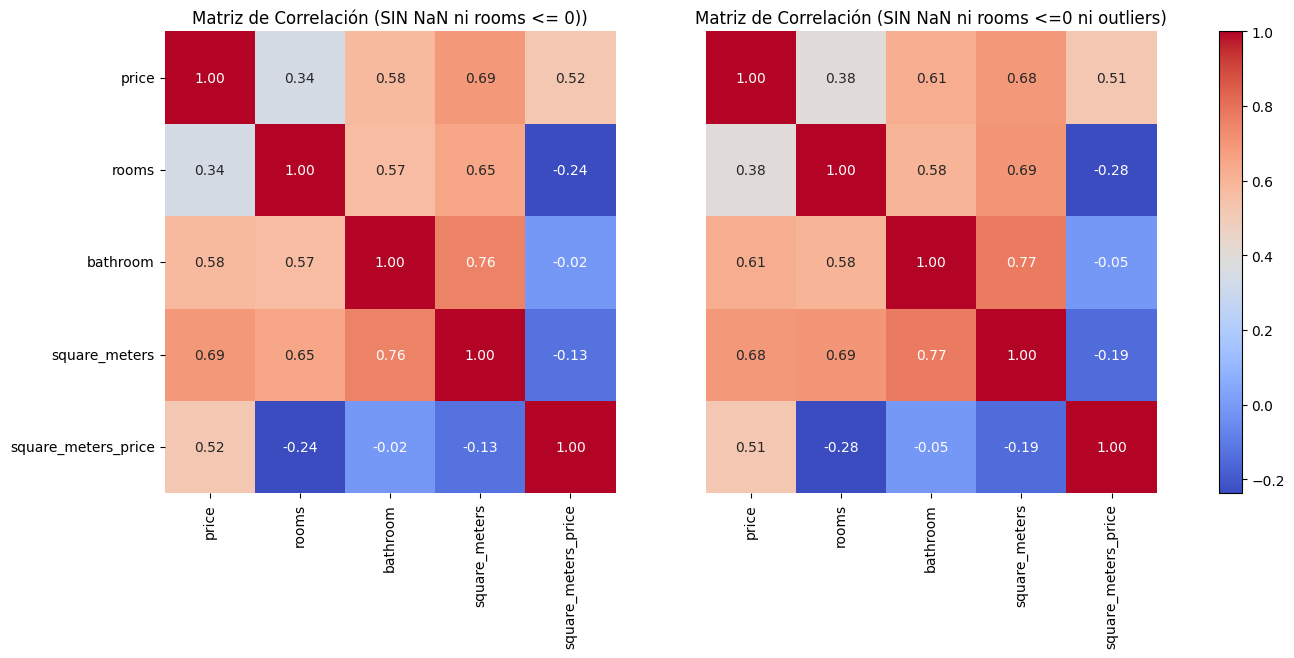

In [115]:
#Matriz de correlación considerando todos los valores y los todos los valores excepto los outliers

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df_clean.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df_clean[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
outliers_combined = pd.concat([outliers_square_meters, outliers_price, outliers_rooms, outliers_bathroom]).drop_duplicates() # Combinar todos los outliers en un solo DataFrame y eliminar  duplicados
df_clean_1 = df_clean_1[~df_clean_1['Unnamed: 0'].isin(outliers_combined['Unnamed: 0'])] # Eliminar los outliers del segundo dataset basándonos en la columna 'Unnamed: 0'
correlation_matrix_filtered = df_clean_1[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (SIN NaN ni rooms <= 0))')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (SIN NaN ni rooms <=0 ni outliers)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
df_clean_1.info()
plt.show()

Visto el resultado de la matriz en el que se observa que no se produce una grave desvirtualización de las relaciones y teniendo en cuenta que previamente habiamos desestimado los registros con numero de habitaciones menor a 1, vamos a testear los resultados de eliminar los registros de outliers al dataframe que contiene los valores con el numero de habitaciones menores a 1 eliminados para tomar la decision final de si eliminamos o no los outliers.

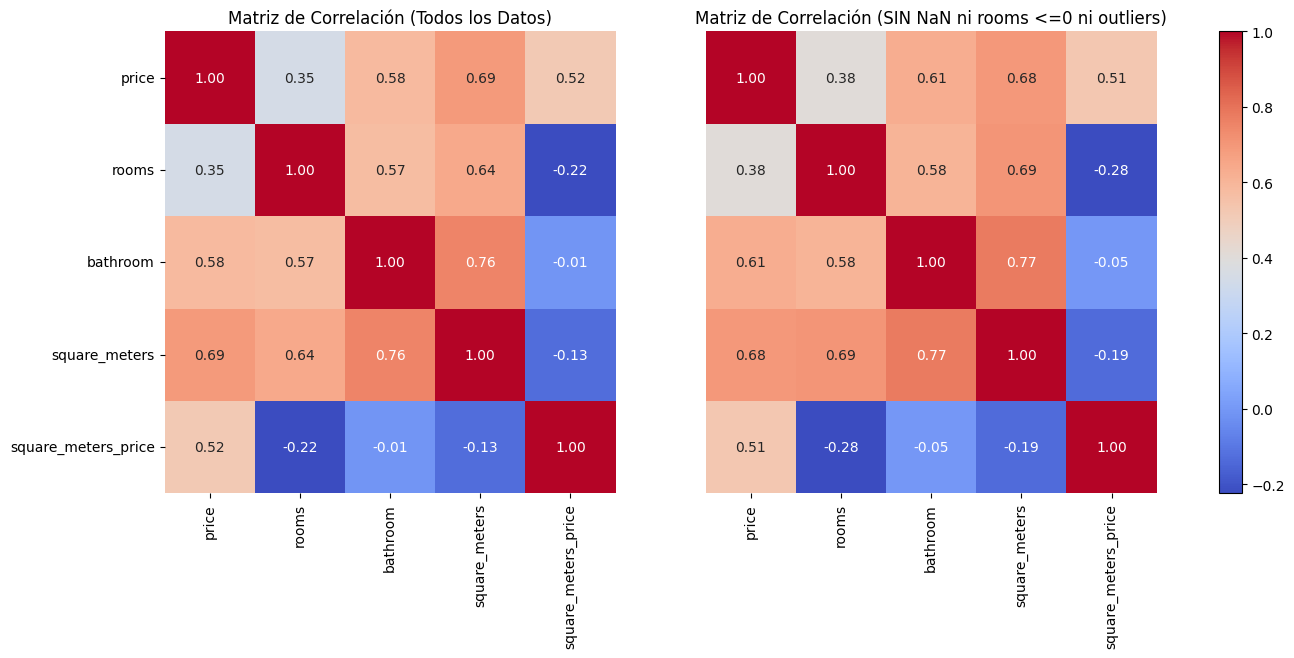

In [116]:
#Matriz de correlación considerando todos los valores y otra con los todos los valores excepto los outliers y los de habitaciones menor de 1

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
#outliers_combined = pd.concat([outliers_square_meters, outliers_price, outliers_rooms, outliers_bathroom]).drop_duplicates() # Combinar todos los outliers en un solo DataFrame y eliminar  duplicados
#df_clean_1 = df_clean[~df_clean['Unnamed: 0'].isin(outliers_combined['Unnamed: 0'])] # Eliminar los outliers del segundo dataset basándonos en la columna 'Unnamed: 0'
correlation_matrix_filtered = df_clean_1[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Todos los Datos)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (SIN NaN ni rooms <=0 ni outliers)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

CONCLUSION

Tras todas la pruebas realizadas decidimos eliminar todos los registros que se han generado tras nuestro testeo de outlaiers puesto que no afectan en gran media a los datos y su interrelación. (Implementado mas arriba)

####*Validación de Categorías Booleanas*:


- Para el ascensor y la terraza, asegúrarnos de que los valores sean consistentes (por ejemplo, "sí" / "no" o 1/0 o Verdadero/Falso, etc.).

In [117]:
# Verificar valores únicos en las columnas 'lift' y 'terrace'
print("Valores únicos en 'lift':", df_clean_1['lift'].unique())
print("Valores únicos en 'terrace':", df_clean_1['terrace'].unique())

Valores únicos en 'lift': [ True False]
Valores únicos en 'terrace': [False  True]


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación en relación a la consistencia de los datos en los campos booleanos en este Dataframe

####*Conversión de Tipos de Datos*:

- Asegúrarnos de que cada columna tiene el tipo de dato adecuado y en caso contrario convertirlo, como por ejemplo el precio a formato numérico si está en texto.

In [118]:
# Imprimir el tipo de cada variable
print(df_clean_1.dtypes)

Unnamed: 0                int64
price                     int64
rooms                     int64
bathroom                  int64
lift                       bool
terrace                    bool
square_meters             int64
real_state               object
neighborhood             object
square_meters_price     float64
predicted_real_state     object
dtype: object


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación en relación a la conversión de tipo de dato de los campos en este Dataframe

# 2. **Análisis Exploratorio de Datos (EDA)**

El dataset seleccionado  contiene información de las propiedades en alquiler que aparecen publicadas en la pagina web  fotocasa.com, en la ciudad de Barcelona. Tiene un total de 10 columnas y 8188 registros que almacenan datos relativos a viviendas y en que sus columnas pueden agruparse en tres grupos. El primero es un grupo de datos numéricos relativos al precio, superficie, numero de dormitorios, etcetera. El segundo es el grupo relativo a los datos informativos de tipo y geolocalización y por ultimo estaria el grupo que define las características de la propiedad que contienen datos relativos a la existencia o no de caracteristicas como ascensor o terraza. Tras limpiar los datos el dataset se ha quedado con 7786 registros y el mismo numero de columnas. Vamos a realizar este EDA final y la representación gráfica basandonos en este ultimo dataset. Para este análisis y representación copiaremos la  variable df_clean_1 en la nueva variable df_eda a fin de compartimentar  y salvaguardar la informacion en cada parte del proceso. Utilizamos esta variable con toda la limpiueza realizada en el punto anterior para poder realizar una lectura y grafia de los datos mas clara qu ela que se obtiene con la variable df_clean

In [119]:
# PREPARACION DE VARIABLE Y CARGA DE DATOS PARA LOS MODELOS
df_eda = df_clean_1.copy() # Asegurar la integridad de los datos entre fases

#Definicion de funciones

#Función para resaltar valores maximos en negrita
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Función para formatear precios
def format_price(price):
    return f'{int(price):,}'.replace(',', '.') + ' €'

# Función para formatear metros cuadrados
def format_sq_m(sq_m):
    return f'{int(sq_m):,}'.replace(',', '.') + ' m²'

## Análisis individualizado de variables

### Valores numéricos

In [120]:
#Estadisticas valores numericos del inmueble
num_cols = df_eda.select_dtypes(include=['number']).drop(columns=['id'], errors='ignore').columns.tolist()
df_eda[num_cols].describe().round(2)

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,7786.00,7786.00,7786.00,7786.00,7786.00,7786.00
mean,4101.70,1385.75,2.46,1.49,83.26,17.49
std,2360.21,868.93,1.08,0.69,43.11,8.48
min,0.00,320.00,0.00,1.00,10.00,5.56
25%,2053.25,880.00,2.00,1.00,57.00,12.76
50%,4095.50,1100.00,2.00,1.00,72.00,15.20
75%,6147.75,1500.00,3.00,2.00,95.00,19.23
max,8187.00,7500.00,7.00,6.00,390.00,144.50


En la tabla se observan los valores de recuento de unidades, media, desviación estandar, mínimo, los percentiles del 25%, 50% y 75%, además del máximo, para todos los valores mumericos estudiados.

### Valores categóricos

In [121]:
#Estadisticas sobre los valores informativos del inmueble
categ_info_cols = df_eda.select_dtypes(include=['object']).columns.tolist()
df_eda[categ_info_cols].describe()

,real_state,neighborhood,predicted_real_state
count,7786,7786,7786
unique,4,10,4
top,flat,Eixample,flat
freq,6413,2325,6413


De esta estadistica se observa que la unidad que mas se da en este estudio en relación a los datos informativos del inmueble es un tipo flat (piso) ubicado en el distrito del Eixample y en una calle inespecífica de ese barrio.

In [122]:
#Estadisticas sobre los valores de caracteristicas del inmueble
categ_caract_cols = df_eda.select_dtypes(include=['bool']).columns.tolist()
df_eda[categ_caract_cols].describe()

,lift,terrace
count,7786,7786
unique,2,2
top,True,False
freq,5420,6200


De esta estadistica podemos observar que la mayoría de las viviendas (5,420 de 7,786) tienen ascensor y la mayoría de las viviendas (6,200 de 7,786) no tienen terraza.

In [123]:
#Recuento de unidades por tipo  de inmueble
df_eda['real_state'].value_counts().sort_values(ascending=False)

,count
real_state,
flat,6413
apartment,978
attic,287
study,108


El tipo de unidad mayoritaria del estudio con absoluta diferencia son los pisos (flat), mientras que losestudios (study) se ubican en el extremo opuesto.

In [124]:
# Crear la tabla pivote, ordenar las filas y redondear a 2 decimales en un solo paso
pivot_table = (
    df.pivot_table(values='square_meters_price', index='real_state', columns='neighborhood', aggfunc='mean')
    .loc[lambda x: x.mean(axis=1).sort_values(ascending=False).index]
    .round(2)
)

display(pivot_table)

neighborhood,Ciutat Vella,Eixample,Gràcia,Horta- Guinardo,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarria-Sant Gervasi
real_state,,,,,,,,,,
apartment,25.82,33.23,30.46,18.62,21.43,25.38,25.95,33.00,32.07,23.04
attic,23.14,20.41,20.37,13.17,18.80,13.75,13.50,27.78,18.51,19.74
study,19.80,21.56,18.45,17.72,13.12,NaN,16.32,22.22,17.53,20.95
flat,16.93,15.98,15.42,13.13,15.14,12.24,12.61,15.83,14.80,16.53


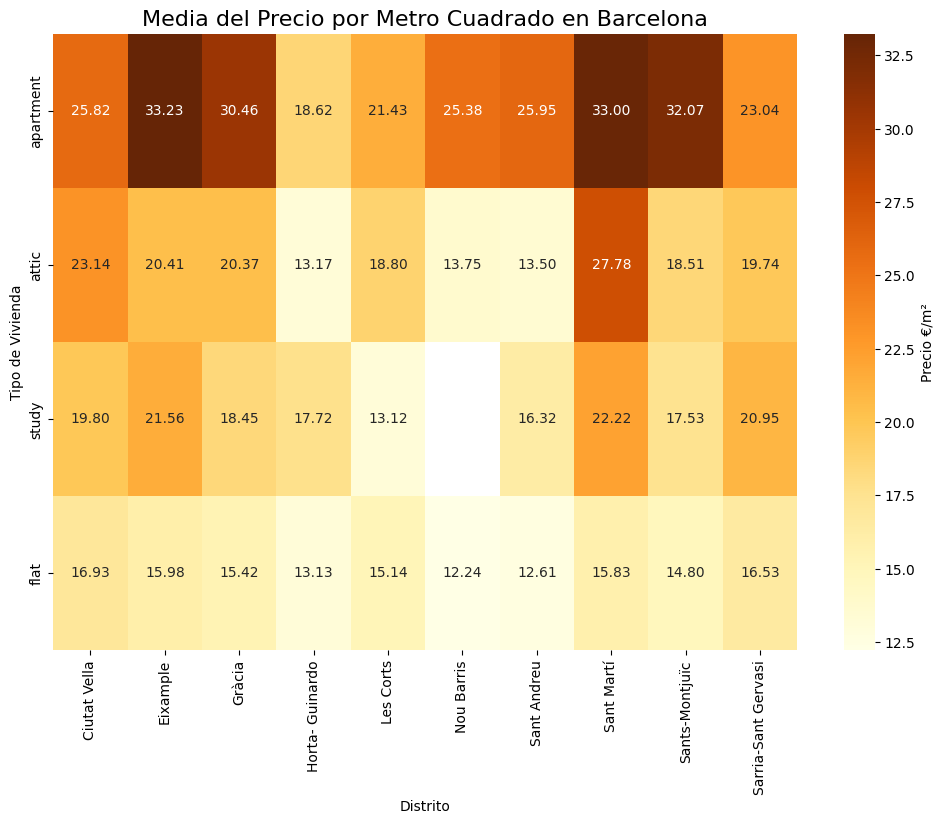

In [125]:
# Crear el mapa de calor YlGnBu
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrBr", cbar_kws={'label': 'Precio €/m²'})

# Configurar los títulos y etiquetas
plt.title("Media del Precio por Metro Cuadrado en Barcelona", fontsize=16)
plt.xlabel("Distrito")
plt.ylabel("Tipo de Vivienda")

# Mostrar el gráfico
plt.show()

Del estudio de precios por metro  cuadrado se observa entre otras muchas cosas, un tipo de vivienda que esta por encima del resto eb cuanto a este valor y que son los apartamentos en cualquier distrito de la ciudad y tambien se desprende que el distrito del Eixample es en el que se da un precio m2 mas caro de toda la ciudad.

In [126]:
#Recuento de unidades por barrio/zona
df_eda['neighborhood'].value_counts().sort_values(ascending=False)

,count
neighborhood,
Eixample,2325
Ciutat Vella,1288
Sarria-Sant Gervasi,1286
Gràcia,652
Sant Martí,584
Sants-Montjuïc,565
Les Corts,501
Horta- Guinardo,303
Sant Andreu,173


El barrio que tiene el mayor numero de unidades del estudio es el Eixample , mientras que el que menos unidades tiene es Nou Barris

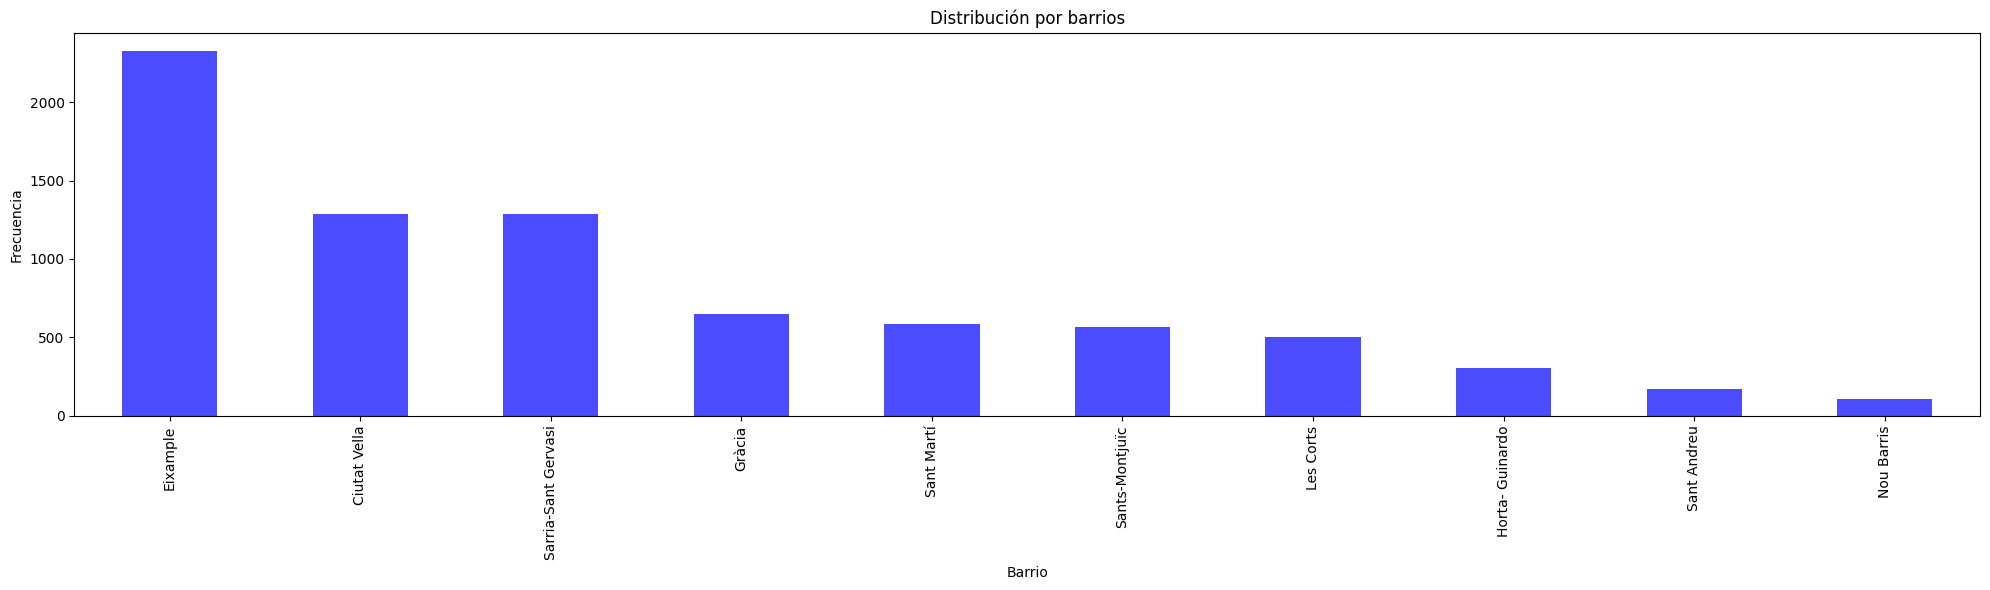

In [127]:
plt.figure(figsize=(20, 6))

# Contar las frecuencias de cada barrio y graficar
df_eda['neighborhood'].value_counts().plot(kind='bar', color='blue', alpha=0.7)

plt.title('Distribución por barrios')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.xlabel('Barrio')

plt.tight_layout()
plt.show()


In [128]:
#Porcentaje de cada caracteristica sobre el total de inmuebles
result = df_eda[categ_caract_cols].apply(lambda x: x.value_counts(normalize=True)*100).round(2).fillna(0).astype(str) + '%'
styled_result = result.style.apply(highlight_max)
styled_result

,lift,terrace
False,30.39%,79.63%
True,69.61%,20.37%


Se observa que las viviendas mayoritarias en el estudio tienen las siguientes caracteristicas. Son viviendas con ascensor y sin terraza.

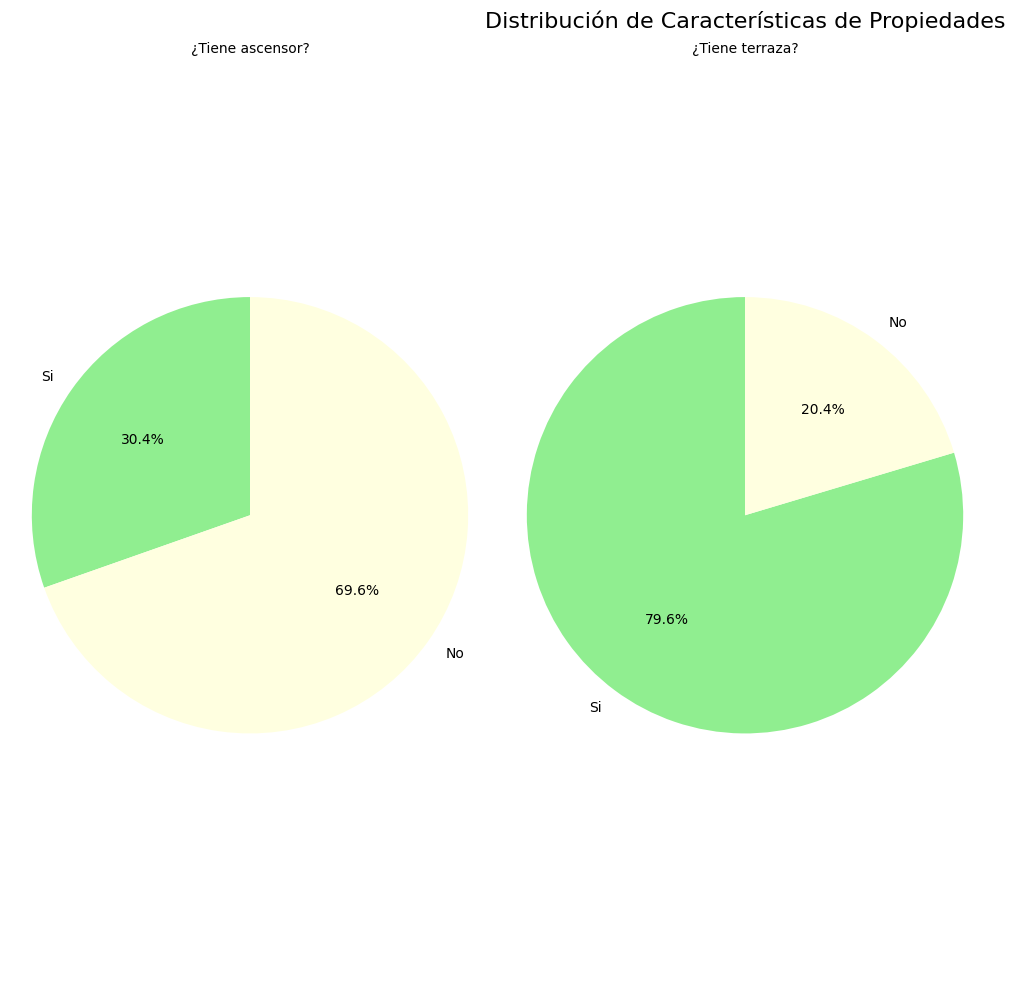

In [129]:
translation_dict = {'lift': 'ascensor','terrace': 'terraza'}

labels = ['Si', 'No']
num_plots = len(result.columns)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axs = axs.flatten()
colors = ['lightgreen', 'lightyellow']

fig.suptitle('Distribución de Características de Propiedades', fontsize=16)

for i, col in enumerate(result.columns):
    values = result[col].str.rstrip('%').astype(float)

    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

    if col == 'needs_renovating':
        title_text = '¿Está reformado?'
    elif col == 'exterior':
        title_text = f'¿Es {translation_dict.get(col, col)}?'
    elif col == 'second_hand':
        title_text = '¿Es de segunda mano?'
    else:
        title_text = f'¿Tiene {translation_dict.get(col, col)}?'

    axs[i].set_title(title_text, fontsize=10, pad=0)
    axs[i].axis('equal')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

,count,mean,median
real_state,,,
flat,6413,84.85,75.0
apartment,978,74.76,65.0
attic,287,92.91,70.0
study,108,39.91,38.0


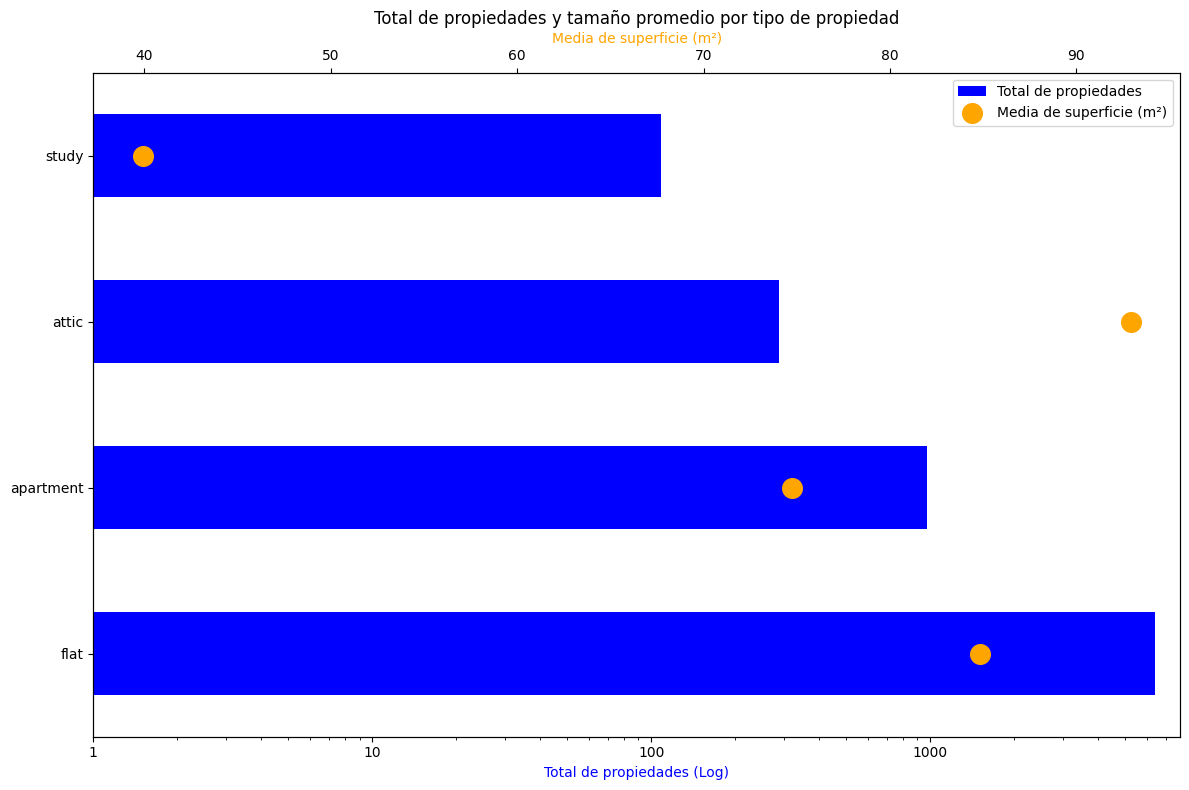

In [130]:
property_stats = df_eda.groupby('real_state')['square_meters'].agg(['count', 'mean','median']).sort_values(by=['count'], ascending=False).round(2)

display(property_stats)

fig, ax1 = plt.subplots(figsize=(12, 8))

bars = property_stats['count'].plot(kind='barh', color='blue', ax=ax1, label='Total de propiedades')

ax2 = ax1.twiny()
for i in range(len(property_stats)):
    ax2.scatter(property_stats['mean'].iloc[i], i, color='orange', s=200, label='Media de superficie (m²)' if i == 0 else "")

ax1.set_xscale('log')
ax1.set_xticks([1, 10, 100, 1000])
ax1.set_xticklabels([1, 10, 100, 1000])

plt.title('Total de propiedades y tamaño promedio por tipo de propiedad')
ax1.set_ylabel('')
ax1.set_xlabel('Total de propiedades (Log)', color='blue')
ax2.set_xlabel('Media de superficie (m²)', color='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.yticks(range(len(property_stats)), property_stats.index)
plt.tight_layout()

plt.show()

En la tabla se observa, ademas de las cifras estadisticas, que la media y la mediana no estan proximas entre ellas y por tanto marcan una agrupación de la cantidad de viviendas balanceada hacia la mitad mas grande o la mas pequeña pero no es equilibrada. En todos los tipos de vivienda se observa que la media de la mitad de viviendas que quedan por encima de la  mediana tienen mas peso en la media general del grupo que no las que quedan por debajo.

En este grafico se observa cual es la media de metros cuadrados por cada tipo de propiedad, añadiendo el numero de propiedades que hay de cada tipo. El gráfico se muestra en escala logaritmica para el eje X.

,flat,attic,apartment,study
square_meters,,,,
0-50,982,63,268,88
50-100,4164,157,573,20
100-150,874,35,98,0
150-200,288,24,25,1
200+,197,36,27,0


<ipython-input-131-40de15c251fb>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  property_counts = df_eda.groupby(['surface_range', 'real_state']).size().unstack(fill_value=0)


<Figure size 2400x1400 with 0 Axes>

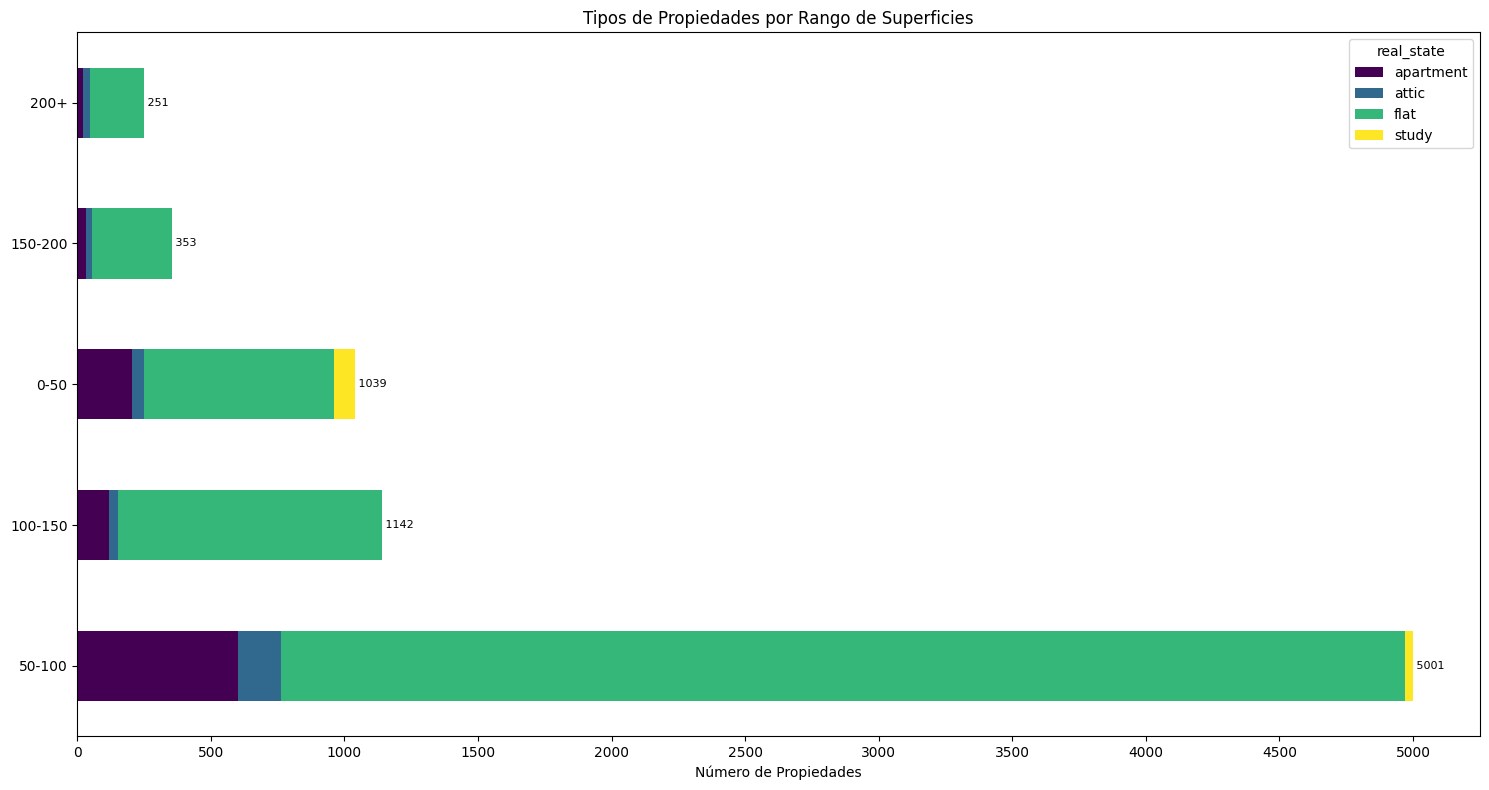

In [131]:
#Tipos de propiedades por rango de superficies
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200+']

results = pd.DataFrame()

for property_type in df_eda['real_state'].unique():
    property_group = df[df['real_state'] == property_type]
    counts = pd.cut(property_group['square_meters'], bins=bins, labels=labels).value_counts(sort=False)
    results[property_type] = counts

results = results.fillna(0)  # Rellenar NaN con 0
results = results.astype(int)  # Convertir a entero si es necesario
styled_result = results.style.apply(highlight_max)
display(styled_result)

plt.rcParams['figure.figsize'] = [15, 8]
df_eda['surface_range'] = pd.cut(df_eda['square_meters'], bins=bins, labels=labels, right=False)

property_counts = df_eda.groupby(['surface_range', 'real_state']).size().unstack(fill_value=0)

property_counts = property_counts.loc[property_counts.sum(axis=1).sort_values(ascending=False).index]


plt.figure(figsize=(24, 14))
ax = property_counts.plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Tipos de Propiedades por Rango de Superficies')
plt.xlabel('Número de Propiedades')
plt.ylabel('')


max_value = property_counts.sum(axis=1).max()
xticks = range(0, max_value + 1, 500)
ax.set_xticks(xticks)


totals = property_counts.sum(axis=1)
for i, total in enumerate(totals):
    ax.annotate(f' {total}',
                (total, i),
                ha='left',
                va='center',
                fontsize=8,
                color='black')

plt.subplots_adjust(right=0.75)

plt.tight_layout()
plt.show()

Del cuadro y el grafico precedentes a estas lineas se observa que las viviendas entre 51 y 100 metros cuadrados son las que mas predominan en la oferta de la muestra doblando sobradamente en numero a la suma del resto de unidades de la muestra.

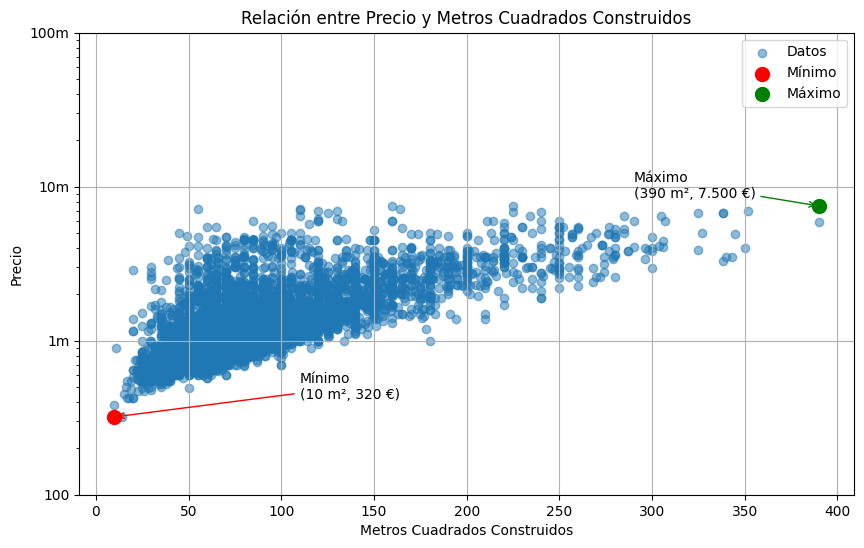

In [132]:
plt.figure(figsize=(10, 6))

plt.scatter(df_eda['square_meters'], df_eda['price'], alpha=0.5, label='Datos')

min_sq_m_built = df_eda['square_meters'].min()
max_sq_m_built = df_eda['square_meters'].max()
min_price = df_eda['price'].min()
max_price = df_eda['price'].max()

plt.scatter(min_sq_m_built, min_price, color='red', s=100, label='Mínimo')
plt.scatter(max_sq_m_built, max_price, color='green', s=100, label='Máximo')

plt.annotate(f'Mínimo\n({format_sq_m(min_sq_m_built)}, {format_price(min_price)})',
             xy=(min_sq_m_built, min_price),
             xytext=(min_sq_m_built + 100, min_price + 100),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.annotate(f'Máximo\n({format_sq_m(max_sq_m_built)}, {format_price(max_price)})',
             xy=(max_sq_m_built, max_price),
             xytext=(max_sq_m_built - 100, max_price + 1000),
             arrowprops=dict(arrowstyle='->', color='green'))

plt.title('Relación entre Precio y Metros Cuadrados Construidos')
plt.xlabel('Metros Cuadrados Construidos')
plt.ylabel('Precio')
plt.grid(True)

plt.yscale('log')

plt.yticks([100, 1000, 10000, 100000], ['100', '1m', '10m', '100m'])
plt.legend()
plt.show()

Del grafico se desprende que la mayoria de propiedades se ubican en los margenes de precio que van de los 500 a 3m, mientras que las superficies oscilan entre los algo mas de 30 m² hasta los 150 m²

<Figure size 800x600 with 0 Axes>

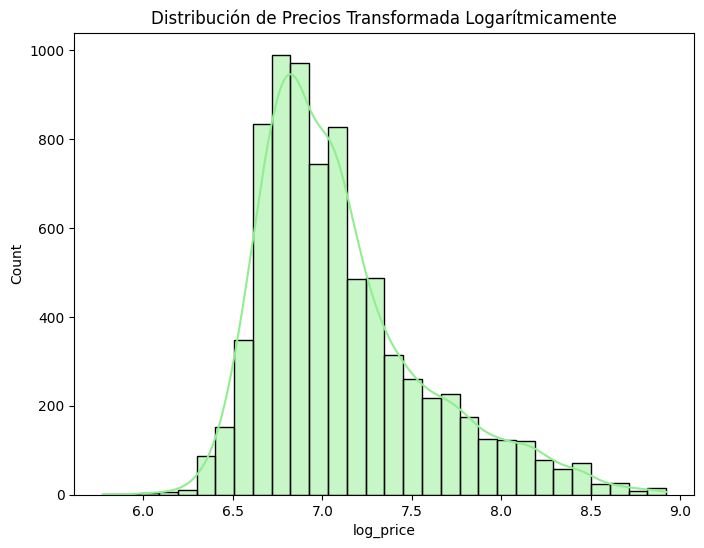

(764.1933530141443, 1943.2623913182051)
(479.0421204350757, 3098.179415763969)


In [133]:
import numpy as np
plt.figure(figsize=(8, 6))
df_eda['log_price'] = np.log1p(df_eda['price'])
plt.figure(figsize=(8, 6))
sns.histplot(df_eda['log_price'], bins=30, kde=True, color = "lightgreen")
plt.title('Distribución de Precios Transformada Logarítmicamente')
plt.show()

mean_log_price = df_eda['log_price'].mean() # mean value
std_log_price = df_eda['log_price'].std() #standard deviation

# Calcula los rangos del 68% y 95%
one_std_range = (mean_log_price - std_log_price, mean_log_price + std_log_price)
two_std_range = (mean_log_price - 2 * std_log_price, mean_log_price + 2 * std_log_price)

# Convertir de nuevo a la escala de precios original
price_bounds_68 = ((np.expm1(one_std_range[0])),(np.expm1(one_std_range[1])))
price_bounds_95 = ((np.expm1(two_std_range[0])),(np.expm1(two_std_range[1])))

print(price_bounds_68)
print(price_bounds_95)

Creamos una nueva columna con los resultados de la   transformación logarítmica porque puede ayudarnos a estabilizar la varianza y hacer que la distribución de precios sea más simétrica. Esto facilita la comparación.

La distribución resultante nos ayuda a identificar patrones o valores atípicos en los precios de alquiler, proporcionando un mejor punto de partida para nuestros análisis.

* 68% de las propiedades tienen precios entre 764,19 € y 1.943,23€.
* 95% of the properties have prices between 479,04 € y 3.098,18€

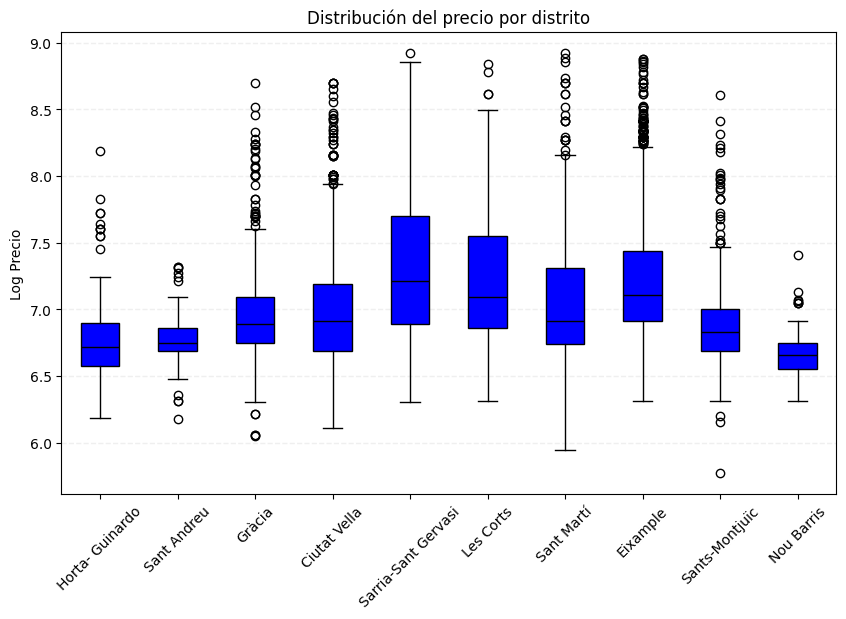

In [134]:
cities = df_eda['neighborhood'].unique()
data = [df_eda[df_eda['neighborhood'] == city]['log_price'] for city in cities]
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data, labels=cities, patch_artist=True)
for box in boxplot['boxes']:
    box.set(facecolor='blue')
for median in boxplot['medians']:
    median.set(color='black')
plt.title('Distribución del precio por distrito')
plt.xticks(rotation = 45)
plt.ylabel('Log Precio')
plt.grid(axis='y', linestyle='--', linewidth=1, alpha=0.2)
plt.show()

## Analisis cruzado de tablas

In [135]:
url = 'https://raw.githubusercontent.com/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/main/hut_comunicacio_opendata.csv'
df_turisticas = pd.read_csv(url)

In [136]:
#Listar los campos del Dataset
df_turisticas.columns.tolist()

['N_EXPEDIENT',
 'CODI_DISTRICTE',
 'NOM_DISTRICTE',
 'CODI_BARRI',
 'NOM_BARRI',
 'TIPUS_CARRER',
 'CARRER',
 'TIPUS_NUM',
 'NUM1',
 'LLETRA1',
 'NUM2',
 'LLETRA2',
 'BLOC',
 'PORTAL',
 'ESCALA',
 'PIS',
 'PORTA',
 'NUMERO_REGISTRE_GENERALITAT',
 'NUMERO_PLACES',
 'LONGITUD_X',
 'LATITUD_Y']

In [137]:
#Listar informacion del Dataset
df_turisticas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10376 entries, 0 to 10375
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_EXPEDIENT                  10376 non-null  object 
 1   CODI_DISTRICTE               10376 non-null  int64  
 2   NOM_DISTRICTE                10376 non-null  object 
 3   CODI_BARRI                   10372 non-null  float64
 4   NOM_BARRI                    10372 non-null  object 
 5   TIPUS_CARRER                 10376 non-null  object 
 6   CARRER                       10376 non-null  object 
 7   TIPUS_NUM                    10376 non-null  int64  
 8   NUM1                         10376 non-null  int64  
 9   LLETRA1                      141 non-null    object 
 10  NUM2                         931 non-null    float64
 11  LLETRA2                      18 non-null     object 
 12  BLOC                         10 non-null     object 
 13  PORTAL          

In [138]:
# Descripción estadística básica
display(df_turisticas.describe())

,CODI_DISTRICTE,CODI_BARRI,TIPUS_NUM,NUM1,NUM2,NUMERO_PLACES
count,10376.000000,10372.000000,10376.000000,10376.000000,931.000000,10253.000000
mean,3.866423,20.158118,1.465015,134.090497,115.961332,5.902858
std,2.804177,20.080939,0.498799,151.945179,127.817631,3.259418
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,7.000000,1.000000,24.000000,28.000000,4.000000
50%,2.000000,10.000000,1.000000,69.000000,74.000000,5.000000
75%,6.000000,31.000000,2.000000,201.000000,133.000000,7.000000
max,10.000000,73.000000,2.000000,1021.000000,1023.000000,79.000000


In [139]:
# Agrupar por el nombre del distrito, contar el número de viviendas y ordenar de mayor a menor
viviendas_por_distrito = (
    df_turisticas.groupby('NOM_DISTRICTE')
    .size()
    .reset_index(name='Cantidad_Viviendas')
    .sort_values(by='Cantidad_Viviendas', ascending=False)
)

# Calcular el total de viviendas
total_viviendas = viviendas_por_distrito['Cantidad_Viviendas'].sum()

# Imprimir el título
print("Distribución de Viviendas Turísticas por Distrito en Barcelona \n")

# Mostrar el DataFrame con los datos por distrito y el total
display(viviendas_por_distrito)
print(f" \n Total de viviendas turísticas: {total_viviendas}\n")

Distribución de Viviendas Turísticas por Distrito en Barcelona 



,NOM_DISTRICTE,Cantidad_Viviendas
3,L'EIXAMPLE,4760
7,SANT MARTI,1232
8,SANTS-MONTJUÏC,1230
1,GRACIA,1119
0,CIUTAT VELLA,757
9,SARRIA-SANT GERVASI,641
4,LES CORTS,260
2,HORTA-GUINARDÓ,240
6,SANT ANDREU,96
5,NOU BARRIS,41


 
 Total de viviendas turísticas: 10376



In [140]:
# Función mejorada para normalizar los nombres de distrito sin usar unidecode ni re
def normalizar_distrito(distrito):
    distrito = distrito.strip().lower()  # Convertir a minúsculas y eliminar espacios adicionales
    # Reemplazar caracteres acentuados manualmente
    distrito = distrito.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    distrito = distrito.replace('-', ' ')  # Reemplazar guiones por espacios
    distrito = ' '.join(distrito.split())  # Reemplazar múltiples espacios con un solo espacio

    # Correcciones específicas de nombres de distrito en Barcelona
    if 'eixample' in distrito:
        distrito = 'eixample'
    elif 'gracia' in distrito or 'gràcia' in distrito:  # Normalizar tanto "gracia" como "gràcia"
        distrito = 'gracia'
    elif 'horta guinardo' in distrito:
        distrito = 'horta guinardo'
    elif 'sarria sant gervasi' in distrito:
        distrito = 'sarria sant gervasi'
    elif 'sant andreu' in distrito:
        distrito = 'sant andreu'
    elif 'sant marti' in distrito:
        distrito = 'sant marti'
    elif 'sants montjuic' in distrito:
        distrito = 'sants montjuic'
    elif 'ciutat vella' in distrito:
        distrito = 'ciutat vella'
    elif 'les corts' in distrito:
        distrito = 'les corts'
    elif 'nou barris' in distrito:
        distrito = 'nou barris'

    return distrito

# Aplicar la función de normalización a ambos datasets
df_turisticas['NOM_DISTRICTE'] = df_turisticas['NOM_DISTRICTE'].apply(normalizar_distrito)
df_clean_1['neighborhood'] = df_clean_1['neighborhood'].apply(normalizar_distrito)

# Agrupar y contar el número de viviendas turísticas por distrito
viviendas_turisticas_por_distrito = (
    df_turisticas.groupby('NOM_DISTRICTE')
    .size()
    .reset_index(name='Viviendas_Turisticas')
)

# Agrupar y contar el número de viviendas en alquiler y calcular el precio promedio
viviendas_alquiler_por_distrito = (
    df_clean_1.groupby('neighborhood')
    .agg(Viviendas_Alquiler=('price', 'size'), Precio_Medio_Alquiler=('price', 'mean'))
    .reset_index()
)

# Renombrar columna para facilitar el merge
viviendas_alquiler_por_distrito.rename(columns={'neighborhood': 'NOM_DISTRICTE'}, inplace=True)

# Combinar los dos DataFrames por el nombre del distrito
tabla_comparativa = pd.merge(
    viviendas_turisticas_por_distrito,
    viviendas_alquiler_por_distrito,
    on='NOM_DISTRICTE',
    how='outer'
).fillna(0)  # Llenar con 0 en caso de que algún distrito no tenga datos en uno de los datasets

# Redondear el precio medio de alquiler a dos decimales
tabla_comparativa['Precio_Medio_Alquiler'] = tabla_comparativa['Precio_Medio_Alquiler'].round(2)

# Calcular el porcentaje de viviendas turísticas sobre el total de viviendas en alquiler
tabla_comparativa['Porcentaje_Viviendas_Turisticas'] = (
    (tabla_comparativa['Viviendas_Turisticas'] / tabla_comparativa['Viviendas_Alquiler']) * 100
).fillna(0).round(2)  # Reemplazar NaN con 0 y redondear a dos decimales

# Convertir la columna de porcentaje a string y añadir el símbolo de porcentaje
tabla_comparativa['Porcentaje_Viviendas_Turisticas'] = tabla_comparativa['Porcentaje_Viviendas_Turisticas'].astype(str) + '%'

# Ordenar por precio medio de alquiler de mayor a menor
tabla_comparativa = tabla_comparativa.sort_values(by='Precio_Medio_Alquiler', ascending=False)

# Mostrar el resultado
print("Comparativa de Viviendas Turísticas y en Alquiler por Distrito en Barcelona")
display(tabla_comparativa)  # Mostrar la tabla con el formato de pandas


Comparativa de Viviendas Turísticas y en Alquiler por Distrito en Barcelona


,NOM_DISTRICTE,Viviendas_Turisticas,Viviendas_Alquiler,Precio_Medio_Alquiler,Porcentaje_Viviendas_Turisticas
9,sarria sant gervasi,641,1286,1765.72,49.84%
4,les corts,260,501,1569.07,51.9%
1,eixample,4760,2325,1532.87,204.73%
7,sant marti,1232,584,1334.05,210.96%
0,ciutat vella,757,1288,1197.14,58.77%
2,gracia,1119,652,1141.20,171.63%
8,sants montjuïc,1230,565,1036.19,217.7%
3,horta guinardo,240,303,909.48,79.21%
6,sant andreu,96,173,894.91,55.49%
5,nou barris,41,109,805.62,37.61%


En esta tabla se observa claramente que hay una presión debido  al  numero de viviendas de alquiler vacacional en relación el numero de viviendas disponibles para el alquiler de larga estancia que en cada momento estan disponibles para el alquiler, que podria ser uno de los motivos de la subida de precios del alquiler que se ha producido en Barcelona en los ultimos años. Debido a esta relación entre ambos tipos de alquiler se observa lo  siguiente:
1. Demanda y Oferta: El alto número de viviendas turísticas reduce la oferta de viviendas disponibles para alquiler a largo plazo, ya que los propietarios prefieren alquilar a turistas, donde los precios por noche suelen ser más altos que los alquileres mensuales. Esto lleva a un aumento en los precios de los alquileres residenciales, ya que la demanda supera la oferta.

2. Gentrificación: En áreas donde las viviendas turísticas son prevalentes, se produce un fenómeno de gentrificación, donde el aumento en el atractivo turístico de la zona lleva a un aumento de los precios de la vivienda en general, incluyendo los precios de los alquileres. Esto desaloja a los residentes locales y cambia la demografía de la zona.

3. Percepción del Valor: Un área con una gran cantidad de viviendas turísticas es vista como más deseable, lo que influye en la percepción del valor de las propiedades y eleva los precios de los alquileres. Si los inquilinos creen que una zona es atractiva debido a la actividad turística, pueden estar dispuestos a pagar más.

4. Regulaciones y Políticas: La proliferación de alquileres turísticos lleva por lo general a regulaciones más estrictas en el mercado de alquileres, lo que a su vez afecta la disponibilidad y los precios de los alquileres a largo plazo.

In [192]:
import folium
import requests
from IPython.display import display, HTML

# Supongamos que tienes un diccionario con las coordenadas de los distritos
coordenadas_distritos = {
    'ciutat vella': (41.375, 2.177),
    'eixample': (41.393, 2.172),
    'gracia': (41.400, 2.157),
    'sant marti': (41.409, 2.203),
    'les corts': (41.386, 2.126),
    'sants montjuïc': (41.368, 2.141),
    'horta guinardo': (41.418, 2.162),
    'sant andreu': (41.43, 2.194),
    'sarria sant gervasi': (41.397, 2.131),
    'nou barris': (41.439, 2.173)
}

# Cargar el archivo GeoJSON con los límites de los distritos
url_geojson = 'https://raw.githubusercontent.com/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/main/0301100100_UNITATS_ADM_POLIGONS.json'
response = requests.get(url_geojson)
distritos_geojson = response.json()

# Crear un mapa centrado en Barcelona sin posibilidad de arrastrar
mapa_barcelona = folium.Map(
    location=[41.4000, 2.1700],
    zoom_start=13,
    tiles='CartoDB positron',  # Mapa base limpio
    control_scale=True,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False  # Desactivar la capacidad de mover el mapa
)

# Agregar la capa de distritos al mapa
# folium.GeoJson(
#    distritos_geojson,
#    style_function=lambda x: {'fillColor': 'black', 'color': 'white', 'weight': 5, 'fillOpacity': 0.9}
#).add_to(mapa_barcelona)

# Agregar marcadores para cada distrito con datos
for index, row in tabla_comparativa.iterrows():
    distrito = row['NOM_DISTRICTE']
    viviendas_turisticas = row['Viviendas_Turisticas']
    viviendas_alquiler = row['Viviendas_Alquiler']

    # Obtener coordenadas del distrito
    coords = coordenadas_distritos.get(distrito.lower())

    # Solo agregar si tenemos coordenadas
    if coords:
        # Crear el texto del tooltip
        tooltip_text = (
            f"<b>{distrito.title()}</b><br>"
            f"{viviendas_turisticas} Viviendas Turísticas<br>"
            f"{viviendas_alquiler} Viviendas de Alquiler"
        )

        # Ajustar el color del marcador según la cantidad de viviendas
        color = 'blue' if viviendas_turisticas > viviendas_alquiler else 'green'
        size = 10 + (viviendas_turisticas / 100)  # Escalar tamaño por el número de viviendas

        # Crear el círculo con tooltip
        folium.CircleMarker(
            location=coords,
            radius=size,
            popup=folium.Popup(tooltip_text, max_width=300),  # Se puede usar también tooltip
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            tooltip=tooltip_text  # Mostrar la información al pasar el mouse
        ).add_to(mapa_barcelona)

        # Añadir el nombre del distrito como texto directamente sobre el círculo
        folium.Marker(
            location=(coords[0] + 0.003, coords[1]),  # Ajustar la posición un poco más arriba
            icon=folium.DivIcon(html=f'<div style="font-size: 12pt; color: black;">{distrito.title()}</div>')
        ).add_to(mapa_barcelona)

# Añadir leyenda en la parte superior izquierda
legend_html = '''
     <div style="position: fixed;
                 top: 50px; left: 50px; width: 180px; height: 65px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 opacity: 0.8">
                 &nbsp; <b>Leyenda</b> <br>
                 &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Viviendas Turísticas<br>
                 &nbsp; <i class="fa fa-circle" style="color:green"></i>&nbsp; Viviendas de Alquiler
      </div>
      '''
mapa_barcelona.get_root().html.add_child(folium.Element(legend_html))

# Mostrar el mapa en un iframe con tamaño fijo
iframe = mapa_barcelona.get_root().render()
display(HTML(f'<div style="width: 800px; height: 700px;">{iframe}</div>'))

En el gráfico representamos con circulos geolocalizados el tipo de vivienda predominante en cada distrito aplicando un tamaño mayor en función del  numero de viviendas que existan del tipo mayoritario. Además hacemos aparecer un popup con informacion del numero de viviendas de cada tipo cuando pasamos el cursor por encima del circulo.

# 3. **Modelado Predictivo**

FUNCION DE EVALUACIÓN DE MODELOS DE REGRESION

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Función para calcular y mostrar las métricas
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    # mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    # print(f'MAPE: {mape:.2f}%')
    print(f'R2: {r2:.2f}')

Preparación de variable, carga de datos, de librerias, pipeline y division datos

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# PREPARACION DE VARIABLE Y CARGA DE DATOS PARA LOS MODELOS
df_model = df_clean.copy() # Asegurar la integridad de los datos entre fases

# Aplicación de ajustes sobre las columnas del Dataframe a fin de
# trabajar con columnas no generadas y con nombres de columnas mas ajustados al contenido de los registros
df_model = df_model.rename(columns={df_model.columns[0]: 'key'}) # Renombrar la primera columna sin nombre a 'key'
df_model = df_model.rename(columns={'real_state': 'property_type'}) # Renombrar la columna 'real_state' a 'property_type'
#df_model = df_model.drop(columns=['square_meters_price']) # Eliminar las columnas 'square_meters_price'

# Separar características (X) y etiqueta (y)
X = df_model.drop(columns=['key', 'price'])
y = df_model['price']
# DETERMINAR SI REALMENTE df ES DONDE TENGO EL DATAFRAME

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pipeline de preprocesamiento y modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rooms', 'bathroom', 'square_meters', 'square_meters_price']),
        ('cat', OneHotEncoder(drop='first'), ['lift', 'terrace', 'property_type', 'neighborhood'])
    ]
)

1. Regresión Lineal

In [145]:
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
# Entrenar y evaluar el modelo de REGRESION LINEAL
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión Lineal:")
evaluate_model(y_test, y_pred)

Regresión Lineal:
MAE: 174.43
MSE: 157781.01
RMSE: 397.22
R2: 0.89


2. Regresión Ridge

In [146]:
from sklearn.linear_model import Ridge

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(alpha=1.0))])

# Entrenar y evaluar el modelo de REGRESION RIDGE
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión Ridge:")
evaluate_model(y_test, y_pred)

Regresión Ridge:
MAE: 174.40
MSE: 157845.24
RMSE: 397.30
R2: 0.89


3. Regresión Lasso

In [147]:
from sklearn.linear_model import Lasso

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(alpha=0.1))])

# Entrenar y evaluar el modelo REGRESION LASSO
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión Lasso:")
evaluate_model(y_test, y_pred)

Regresión Lasso:
MAE: 174.30
MSE: 157920.64
RMSE: 397.39
R2: 0.89


4. Regresión ElasticNet

In [148]:
from sklearn.linear_model import ElasticNet

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))])

# Entrenar y evaluar el modelo REGRESION ELASTICNET
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión ElasticNet:")
evaluate_model(y_test, y_pred)

Regresión ElasticNet:
MAE: 176.81
MSE: 177628.42
RMSE: 421.46
R2: 0.87


5. Arbol de decisión de regresión

In [149]:

from sklearn.tree import DecisionTreeRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(max_depth=5, random_state =123))])

# Entrenar y evaluar el modelo ARBOL DE DECISION DE REGRESION
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Arbol de decisión de regresión:")
evaluate_model(y_test, y_pred)

Arbol de decisión de regresión:
MAE: 209.12
MSE: 98704.15
RMSE: 314.17
R2: 0.93


6. Random Forest Regresion

In [150]:

from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))])

# Entrenar y evaluar el modelo RANDOM FOREST REGRESION
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Regresion:")
evaluate_model(y_test, y_pred)

Random Forest Regresion:
MAE: 146.45
MSE: 45400.55
RMSE: 213.07
R2: 0.97


7. Regresión por Aumento de Gradiente

In [151]:

from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42))])

# Entrenar y evaluar el modelo REGRESION POR AUMENTO DE GRADIENTE
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión por Aumento de Gradiente:")
evaluate_model(y_test, y_pred)

Regresión por Aumento de Gradiente:
MAE: 25.67
MSE: 5182.16
RMSE: 71.99
R2: 1.00


8. Regresión de Vectores de Soporte(SVR)

In [152]:

from sklearn.svm import SVR

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))])

# Entrenar y evaluar el modelo REGRESION SVR
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión de Vectores de Soporte:")
evaluate_model(y_test, y_pred)

Regresión de Vectores de Soporte:
MAE: 443.66
MSE: 1194007.73
RMSE: 1092.71
R2: 0.13


9. Regresión de los K Vecinos Más Cercanos (KNN)

In [153]:

from sklearn.neighbors import KNeighborsRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor(n_neighbors=5))])

# Entrenar y evaluar el modelo REGRESION KNN
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresion KNN:")
evaluate_model(y_test, y_pred)

Regresion KNN:
MAE: 152.37
MSE: 123151.61
RMSE: 350.93
R2: 0.91


**RESUMEN DE RESULTADOS, ANALISIS Y CONCLUSION DE LOS 9 MODELOS APLICADOS**

Trabajamos con la variable df_clean, que tiene un total de 7XXX registros tras eliminar los nulos porque es la que mejores resultados ofrece al modelo

**Resumen de resultados:**

| Modelo                         | MAE       | MSE      |  RMSE        | R2        |  
|----------------------------------|-----------|-----------|------------|-----------|
| Regresión Lineal             | 174.43  | 157781.01  | 397.22     | 0.89     |
| Regresión Ridge              | 174.40  | 157845.24  | 397.30     | 0.89     |
| Regresión Lasso              | 174.30  | 157920.64  | 397.39     | 0.89     |
| Regresión ElasticNet          | 176.81  | 177628.42  | 421.46     | 0.87     |
| Árbol de decisión de regresión | 209.12  | 98704.15  | 314.17     | 0.93     |
| Random Forest Regresion       | 146.45  | 45400.55  | 213.07     | 0.97     |
| Regresión por Aumento de Gradiente| 25.67  | 5182.16  | 71.99     | 1.00     |
| Regresión de Vectores de Soporte| 443.66  | 1194007.73  | 1092.71     | 0.13     |
| Regresion KNN                | 152.37  | 123151.61  | 350.93     | 0.91     |

---
**Análisis:**

*   **MAE (Error Absoluto Medio):** Mide la magnitud promedio de los errores en las predicciones. Un valor más bajo es mejor. Gradient Boosting tiene el MAE más bajo (25.67).
*   **MSE (Error Cuadrático Medio):** Mide el promedio de los errores al cuadrado, penalizando más los errores grandes. Un valor más bajo es mejor. Gradient Boosting también tiene el MSE más bajo (5182.16).
*   **RMSE (Error Cuadrático Medio):** Similar al MAE, pero penaliza más los errores grandes. Un valor más bajo es mejor. Gradient Boosting también tiene el RMSE más bajo (71.99).
*   **R2 (Coeficiente de determinación):** Indica la proporción de la varianza en la variable objetivo que se explica por el modelo. Un valor más cercano a 1 es mejor. Gradient Boosting tiene el R2 más alto posible (1.00).

**Conclusión:**

*   **Gradient Boosting** parece ser el modelo con mejor rendimiento general en nuestro caso, con el MAE, MSE, RMSE y R2 más favorables.
*   **Árbol de decisión, Random Forest y KNN** tienen un rendimiento similar y bastante bueno, con valores de MAE, RMSE y R2 relativamente bajos.
*   **ElasticNet, Regresión Lineal, Ridge y Lasso** tienen un rendimiento moderado, pero no tan bueno como los modelos anteriores.
*   **Regresión de Vectores de Soporte (SVR)** tiene el peor rendimiento en este caso, con valores de MAE y RMSE mucho más altos y un R2 bajo.


**Consideraciones adicionales:**

*   Hemos de recordar que los resultados son específicos de nuestro conjunto de datos y la forma en que dividimos el entrenamiento y la prueba.
*   Podria sernos útil ajustar los hiperparámetros de los modelos para intentar mejorar más el rendimiento aunque tenemos un modelo que funciona practicamente perfecto.
*   Debemos tener en cuenta si el modelo es interpretable y tamboién su precisión para elegir el modelo final.
*   La regresión busca una relación matemática, no una causalidad.

En lineas generales, el modelo **Gradient Boosting** parece ser la **mejor opción** para este caso, con los parámetros usados en los modelos pero como deciamos antes quizá deberiamos probar a ajustar los modelos con la división de test/prueba y con los hiperparametros para probar si podriamos obtener un resultado que mejore el buen resultado obtenido .

#4. **Recomendaciones**

Del estudio que hemos realizado sacamos dos tipos de conclusiones que nos permiten realizar una serie de recomendaciones técnicas, en cuanto a la elaboración de este cuaderno y cual es el mejor camino para obtener  los mejores resultados predictivos y por otro lado una serie de recomendaciones emanadas de la lectura de los resultados de la EDA.

En cuanto a las recomendaciones técnicas hemos  observado que la mejor alternativa para poder obtener un modelo predictivo adecuado pasa por un modelo de Gradient Boosting Regresion que nos ofrece el mejor resultado posible.

A lo largo de todo el proceso hemos limpiado el dataset original situado en la variable df en varias fases dando como resultado diversas variables que contenian los datos modificados o eliminados que hemos considerado tras el proceso de preparación.

Una primera variable, concretamente la llamada df_clean, albergaba los datos de la variable df menos los registros NaN, otra variable, concretamente la llamada df_clean_1 contenia los valores de df_clean menos las viviendas de cero dormitorios del tipo studio y apartamento que tuviesen una desviacion que las ubicase por encima del Q3 y tambien habiendo eliminado  todos los demas registros en que las habitaciones fuesen 0 de los otros dos  tipos de vivienda.

En consecuencia, teniamos tres variables distintas para probar nuestros modelos de predicción. Antes de iniciar los test añadimos una columna a la variable utilizada para hacer el EDA con la transformación logaritmica de los precios de alquiler a fin de reducir la asimetria y hacer que la distribución sea mas normal, lo que podria facilitar el mejor funcionamiento de nuestros modelos. Tras realizar los test con las tres variables y con y sin la columna de los valores logaritmicos del precio de alquiler, observamos que la mejor alternativa era utilizar la variable  df_clean sin la columna de valores logaritmicos y esto nos daba los mejores resultados con todos los modelos y conseguia ofrecernos en el modelo Gradient Boosting Regresion unos resultados excelentes. Probamos adaptaciones sobre todos los hiperparametros que pudimos abordar y dejamos ajustados dichos hiperparametros a la mejor graduación que encontramos.

**Como recomendacion final consideramos que se debe utilizar un Gradient Boosting Regresion, con un 20% en train, utilizando los datos del dataframe original menos los NaN y ajustando los hiperparametros del modelo antesindicado del siguiente modo; 100 arboles de decision con una profundidad de 5 niveles, lo que nos ofrece un valor efectivo y un balance entre la capacidad de aprender patrones complejos y mantener la generalización.**

En cuanto a las recomendaciones obtenidas de la EDA debemos adelantar que los datos que manejamos en el dataset son muy reducidos y por tanto las recomendaciones que podemos realizar en base al estudio y cruce de datos de este dataset es muy básica y limitada. Sin embargo hemos querido de algún modo dar complejidad al estudio sin entrar en hacer grandes afirmaciones, pues por falta de  tiempo resulta inviable poder extraer un analisis mas complejo.

Estas recomendaciones o/y observaciones serian:

- Distrito con el precio mas bajo: Nou Barris
- Distrito  con el precio mas elevado: Sarria-Sant Gervasi
- Mayor oferta de vivienda: Eixample
- Menor oferta de vivienda: Nou Barris
- Tipo de vivienda mas abundante: Piso
- Tipo de vivienda mas escasa: Estudio
- Viviendas standard de cada tipo:

    - Pisos, aticos y apartamentos estan entre 50 y 100m2
    - Estudios estan entre 0 y 50m2

- Para inversores, recomendamos la localizacion de espacios que permitan albergar apartamentos de una superficie entre 50 y 70 m2 para destinarlas al alquiler en el Eixample, Sant Martí o Sant-Montjuic pues son los distritos que mayor precio de alquiler poseen. Habria que estudiar los tipos de espacio disponibles y sus precios para poder concretar esta recomendación en toda su idea.

-Para inquilinos que deseen áticos los mejores distritos en relación al precio metro cuadrado serianlos de Nou barris, Horta- Guinardo y Sant Andreu.

- Para inquilinos que deseen poca superficie y por tanto quieran un estudio el mejor distrito en relación al precio metro cuadrado es Les Corts

- Tambien podemos intuir, aunque faltaria hacer un estudio mas en profundidad, que a los inversores que deseen poseer una vivienda en Barcelona les resulta mas atractivo el mercado de la vivienda de alquiler vacacional que el alquiler tradicional si como criterio para afirmar esto observamos el numero de vivienda vacacional registrada oficialmente que existe en la ciudad a disposición de  los turistas. Ese número de viviendas superior al de viviendas de alquiler tradicional que se dan en un momento determidado de la comercialización de estas indica que hay muchos propietarios que sus viviendas las tienen alquiladas como vacacionales y por tanto parece ser que es una opción mas atractiva que la del alquiler tradicional o de larga estancia.

Podriamos realizar una lista de recomendaciones mayor aunque consideramos que para el caso que nos ocupa podria ser un numero adecuado el que hemos ofrecido.

#5. **Guia de los Modelos y de la Interpretación de Resultados con explicación Técnica y Práctico/Didáctica**

## **Modelo de regresión, sus ventajas, desventajas, y ejemplos prácticos de cuándo se suele usar cada uno.**

---

### 1. **Regresión Lineal** (`Linear Regression`)

La regresión lineal es uno de los modelos más básicos y se basa en la suposición de que existe una relación lineal entre las características de entrada y la variable objetivo. Es ideal para problemas en los que los datos siguen aproximadamente una línea recta.

- **Ventajas**: Fácil de interpretar y rápido de entrenar. Es útil cuando se requiere un modelo explicativo con pocos datos o pocas características.
- **Desventajas**: Asume una relación lineal entre las variables y es sensible a valores atípicos.
- **Cuándo usarlo**: Para relaciones simples y lineales, especialmente cuando se necesita interpretabilidad.
- **Ejemplo**: Predecir el precio de una vivienda en función de características como metros cuadrados, número de habitaciones y número de baños en un vecindario con precios estables.

---

### 2. **Regresión Ridge** (`Ridge Regression`)

La regresión Ridge es una extensión de la regresión lineal que agrega una penalización L2, que reduce el efecto de variables que podrían estar causando sobreajuste (cuando el modelo es demasiado preciso en los datos de entrenamiento y pierde precisión en los datos de prueba).

- **Ventajas**: Controla el sobreajuste, especialmente en conjuntos de datos con características muy correlacionadas (multicolinealidad).
- **Desventajas**: La penalización puede hacer que el modelo sea menos intuitivo y requiere ajuste del parámetro de regularización.
- **Cuándo usarlo**: Cuando hay muchas variables correlacionadas o si necesitas reducir el sobreajuste sin eliminar variables.
- **Ejemplo**: Predicción del precio de una vivienda en función de características de la casa y del vecindario, donde algunas variables están altamente correlacionadas, como el tamaño y el número de habitaciones.

---

### 3. **Regresión Lasso** (`Lasso Regression`)

La regresión Lasso utiliza una penalización L1, lo que no solo reduce el sobreajuste, sino que también puede reducir algunos coeficientes a cero, eliminando así características irrelevantes. Esto hace que Lasso sea útil para la selección de características.

- **Ventajas**: Reduce el sobreajuste y realiza selección de características, lo que ayuda en modelos interpretables.
- **Desventajas**: Puede eliminar variables importantes si estas son menos significativas en comparación con otras, y su estabilidad disminuye si hay muchas características correlacionadas.
- **Cuándo usarlo**: Cuando tienes muchas características y deseas hacer una selección automática de las más relevantes.
- **Ejemplo**: Predicción del precio de una vivienda en función de muchas características, donde algunas pueden no ser relevantes, como variables sobre materiales de construcción si ya se considera el año de construcción.

---

### 4. **ElasticNet Regression**

ElasticNet combina las penalizaciones L1 y L2 de Lasso y Ridge, lo cual resulta útil para casos en los que hay muchas características, algunas de las cuales pueden estar correlacionadas entre sí.

- **Ventajas**: Combina lo mejor de Lasso y Ridge, controlando el sobreajuste y seleccionando características.
- **Desventajas**: Requiere ajuste de dos hiperparámetros (alpha para regularización y l1_ratio para combinar las penalizaciones L1 y L2).
- **Cuándo usarlo**: Cuando tienes muchas características, algunas de las cuales están correlacionadas entre sí, y deseas un balance entre reducción de sobreajuste y selección de características.
- **Ejemplo**: Predicción de precios de viviendas considerando factores como la ubicación, el tamaño, características del vecindario y año de construcción, donde algunos de estos factores podrían estar correlacionados.

---

### 5. **Regresión con Árbol de Decisión** (`Decision Tree Regression`)

Este modelo segmenta los datos en diferentes subconjuntos basándose en preguntas binarias, creando un "árbol" de decisiones que segmenta el espacio de predicción en rectángulos. Funciona bien con relaciones no lineales complejas y es fácil de interpretar.

- **Ventajas**: No requiere mucho procesamiento de datos (por ejemplo, escalado de características), es interpretable y puede capturar relaciones no lineales.
- **Desventajas**: Propenso al sobreajuste en datos con ruido, y su rendimiento puede variar según la profundidad del árbol.
- **Cuándo usarlo**: Cuando tienes relaciones no lineales complejas y necesitas interpretabilidad.
- **Ejemplo**: Predecir el precio de una vivienda en función de la ubicación (urbana/rural), tipo de propiedad y cercanía a servicios, donde puede haber relaciones complejas entre variables.

---

### 6. **Bosque Aleatorio** (`Random Forest Regression`)

Un Random Forest es un conjunto de múltiples árboles de decisión, donde cada árbol se entrena en una muestra diferente de los datos y se promedian las predicciones. Esto mejora la precisión del modelo al reducir el sobreajuste.

- **Ventajas**: Reduce el sobreajuste y es más robusto que un solo árbol de decisión. Además, puede manejar relaciones no lineales.
- **Desventajas**: Consume más recursos y es menos interpretable que un árbol único.
- **Cuándo usarlo**: Cuando tienes relaciones no lineales y quieres mejorar la precisión sin sobreajustar.
- **Ejemplo**: Predecir el precio de una vivienda considerando variables complejas, como características estructurales, demográficas y del vecindario.

---

### 7. **Gradient Boosting Regression**

Este es otro método basado en árboles que construye secuencialmente un conjunto de árboles de decisión, donde cada árbol intenta corregir los errores de los árboles anteriores. Es muy preciso y captura relaciones complejas.

- **Ventajas**: Es uno de los modelos más potentes para datos con relaciones complejas, especialmente cuando los datos están bien ajustados.
- **Desventajas**: Consume mucho tiempo de entrenamiento y es propenso al sobreajuste si no se ajusta bien.
- **Cuándo usarlo**: Cuando necesitas un modelo muy preciso y tienes suficiente tiempo de procesamiento para entrenarlo.
- **Ejemplo**: Predecir el precio de una vivienda en función de varias características complejas, incluyendo características del vecindario, clima y servicios, donde existen interacciones no lineales entre factores.

---

### 8. **Support Vector Regression (SVR)**

SVR utiliza un margen o "tubo" alrededor de los datos, y solo ajusta los puntos que están fuera de ese margen. Es útil para datos con ruido o valores atípicos, o donde las relaciones no son completamente lineales.

- **Ventajas**: Robusto frente al ruido y puede capturar relaciones complejas no lineales.
- **Desventajas**: Es computacionalmente intensivo y no se adapta bien a conjuntos de datos muy grandes.
- **Cuándo usarlo**: Cuando tienes un conjunto de datos pequeño o mediano con posibles valores atípicos y relaciones no lineales.
- **Ejemplo**: Predecir el precio de una vivienda en una pequeña área metropolitana, donde los precios pueden variar considerablemente debido a factores exclusivos del vecindario.

---

### 9. **K-Nearest Neighbors Regression** (`KNN Regression`)

KNN es un modelo basado en instancias que predice el valor objetivo basándose en los "k" vecinos más cercanos. No asume ninguna relación particular entre características y objetivo, lo que lo hace útil para relaciones complejas.

- **Ventajas**: No asume una forma específica para la relación entre características y objetivo, y es fácil de implementar.
- **Desventajas**: Sensible a la escala de los datos y consume tiempo en grandes conjuntos de datos.
- **Cuándo usarlo**: Para relaciones no lineales y cuando los datos son de tamaño mediano y tienen una escala uniforme.
- **Ejemplo**: Predicción del precio de una vivienda en función de características similares en el vecindario, considerando solo las viviendas más cercanas para hacer la predicción.

---

### Resumen de Aplicaciones

- **Regresión Lineal, Ridge, Lasso, ElasticNet**: Son adecuados para datos con relaciones lineales o cuando necesitas interpretabilidad y control sobre el sobreajuste.
- **Árbol de Decisión, Random Forest, Gradient Boosting**: Son útiles para relaciones no lineales y efectos complejos. Random Forest y Gradient Boosting suelen ser más robustos y precisos.
- **SVR**: Útil en datos pequeños con relaciones no completamente lineales y con valores atípicos.
- **KNN**: Es útil en análisis locales o vecinales y para relaciones complejas sin una forma específica, siempre y cuando el conjunto de datos no sea demasiado grande.

La elección final depende de la relación entre las características y el objetivo, el tamaño y calidad de los datos, y el nivel de interpretabilidad y precisión que necesites.

## **Explicación PRÁCTICA Y DIDÁCTICA de métricas de evaluación para regresión.**

### 1. **Error Cuadrático Medio (MSE)**

- **¿Qué es?**: Es una medida que indica cuánto se desvían, en promedio, las predicciones del modelo de los valores reales. Se calcula tomando la diferencia entre cada predicción y el valor real, elevando al cuadrado esas diferencias (para evitar que se cancelen entre sí), y luego promediando esos valores.

- **Interpretación**: Un MSE más bajo significa que el modelo está haciendo mejores predicciones. Sin embargo, como se elevan al cuadrado las diferencias, un MSE más alto indica errores significativos.

- **Cuándo usarlo**: Cuando te preocupa especialmente cometer errores grandes. Por ejemplo, en un modelo de precios de viviendas, un error grande podría tener un impacto financiero significativo.

---

### 2. **Raíz del Error Cuadrático Medio (RMSE)**

- **¿Qué es?**: Es simplemente la raíz cuadrada del MSE. Se hace esto para volver a las mismas unidades que los valores reales, lo que facilita la interpretación.

- **Interpretación**: Al igual que el MSE, un RMSE más bajo significa mejores predicciones. La ventaja es que ahora puedes entenderlo más fácilmente, porque está en las mismas unidades que el precio de la vivienda, por ejemplo.

- **Cuándo usarlo**: Se utiliza a menudo porque es más intuitivo. Si tienes un modelo de precios, y el RMSE es $10,000, significa que en promedio te estás equivocando en $10,000.

---

### 3. **Error Absoluto Medio (MAE)**

- **¿Qué es?**: Esta métrica mide la diferencia promedio entre las predicciones y los valores reales, pero sin elevarlas al cuadrado. Simplemente se toma la diferencia absoluta.

- **Interpretación**: Al ser una media de errores absolutos, un MAE más bajo significa que el modelo es más preciso. También está en las mismas unidades que los valores reales, lo que lo hace fácil de entender.

- **Cuándo usarlo**: Es útil cuando quieres evitar que los errores grandes influyan demasiado en la evaluación del modelo. Ideal para situaciones donde hay posibles errores atípicos.

---

### 4. **Error Absoluto Medio Porcentual (MAPE)**

- **¿Qué es?**: Este mide el error promedio como un porcentaje. Compara la diferencia entre la predicción y el valor real en relación al valor real.

- **Interpretación**: Muestra qué tan lejos están tus predicciones en términos porcentuales, lo que es útil para entender la precisión de un modelo en relación a diferentes escalas. Por ejemplo, si un modelo tiene un MAPE de 5%, eso significa que, en promedio, sus predicciones son un 5% diferentes de los valores reales.

- **Cuándo usarlo**: Es útil cuando deseas comparar errores entre diferentes conjuntos de datos o escalas, pero no se recomienda cuando los valores reales son cero o muy pequeños.

---

### 5. **R-cuadrado (R²)**

- **¿Qué es?**: Esta métrica mide cuánta variación de los valores reales es explicada por el modelo. Se expresa como un número entre 0 y 1, donde 1 significa que el modelo explica toda la variación.

- **Interpretación**: Un R² más alto indica que el modelo hace un buen trabajo explicando los datos. Si R² es 0.8, significa que el 80% de la variación en los precios de las casas es explicada por el modelo.

- **Cuándo usarlo**: Es útil para tener una idea general de qué tan bien está funcionando tu modelo, aunque no siempre es la mejor métrica, especialmente con datos no lineales.

---

### 6. **Error Cuadrático Medio Logarítmico (MSLE)**

- **¿Qué es?**: Esta métrica se parece al MSE, pero en lugar de trabajar con los valores directamente, trabaja con sus logaritmos. Esto es útil cuando los datos pueden tener un rango amplio.

- **Interpretación**: El MSLE es menos sensible a errores en valores altos y se centra más en errores relativos, lo que puede ser útil en situaciones donde los datos crecen exponencialmente.

- **Cuándo usarlo**: Es útil en casos donde los valores varían mucho, como en predicciones de población o ingresos.

---

### Resumen Visual de Cuándo Usar Cada Métrica

- **MSE**: Cuando te preocupan mucho los errores grandes.
- **RMSE**: Para una interpretación clara en las mismas unidades que los datos.
- **MAE**: Cuando quieres evitar que los errores grandes afecten tu evaluación.
- **MAPE**: Para comparar errores entre diferentes conjuntos de datos en términos porcentuales.
- **R²**: Para entender qué tan bien el modelo explica los datos.
- **MSLE**: Cuando los datos tienen un rango amplio o crecen exponencialmente.

### Ejemplo Simple

Imagina que estás tratando de predecir el precio de una vivienda. Si tu modelo predice $200,000, pero el precio real es $210,000:

- **MSE**: (210,000 - 200,000)² = $100,000,000 → MSE sería alto si tienes muchos errores grandes.
- **RMSE**: √MSE → Fácil de entender, vuelve a unidades de dólares.
- **MAE**: |210,000 - 200,000| = $10,000 → Sabes que en promedio te estás equivocando en $10,000.
- **MAPE**: (|210,000 - 200,000| / 210,000) × 100 = 4.76% → Sabes que estás a un 4.76% del precio real.
- **R²**: Mide cuánto de la variación en los precios es explicada por tu modelo.
- **MSLE**: Compara el logaritmo de los valores, útil si tienes un rango de precios muy amplio.

Con esta información, ahora tienes una mejor idea de cómo se evalúan los modelos de regresión y cuál podría ser la métrica más adecuada según tu situación. Si tienes más preguntas o necesitas ejemplos específicos, ¡no dudes en preguntar!

## **Explicación TÉCNICA de métricas de evaluación más importantes para problemas de regresión, sus usos y cómo interpretarlas**
---

### 1. **Error Cuadrático Medio (MSE - Mean Squared Error)**

El MSE mide el promedio de los cuadrados de las diferencias entre los valores reales y las predicciones del modelo. Como eleva al cuadrado las diferencias, penaliza más los errores grandes, por lo que es sensible a valores atípicos.

- **Fórmula**:
  \[
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  \]
  donde \( y_i \) es el valor real, \( \hat{y}_i \) es la predicción, y \( n \) es el número total de observaciones.

- **Interpretación**: Un MSE más bajo indica mejor precisión, pero como los valores están al cuadrado, no es directamente interpretable en las unidades originales de la variable objetivo.

- **Cuándo usarlo**: Ideal cuando quieres penalizar fuertemente los errores grandes. Se usa mucho en problemas donde los errores grandes son indeseables, como en sistemas de recomendación y predicciones financieras.

---

### 2. **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**

La RMSE es simplemente la raíz cuadrada del MSE, lo que la lleva de vuelta a las mismas unidades que la variable objetivo, haciéndola más fácil de interpretar.

- **Fórmula**:
  \[
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  \]

- **Interpretación**: Al igual que el MSE, un RMSE más bajo indica mejor precisión. La ventaja es que el RMSE está en las mismas unidades que la variable de salida.

- **Cuándo usarlo**: Es útil cuando deseas una interpretación más directa en las mismas unidades que la variable objetivo. Es especialmente popular en aplicaciones de predicción de precios, como bienes raíces y ventas.

---

### 3. **Error Absoluto Medio (MAE - Mean Absolute Error)**

El MAE mide el promedio de las diferencias absolutas entre los valores reales y las predicciones, sin elevarlas al cuadrado, por lo que no penaliza tan fuertemente los errores grandes como el MSE.

- **Fórmula**:
  \[
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  \]

- **Interpretación**: El MAE también mide la precisión del modelo, y un MAE más bajo indica un modelo más preciso. Es fácil de interpretar ya que da el promedio de los errores en las mismas unidades que la variable de salida.

- **Cuándo usarlo**: Es una buena opción cuando tienes valores atípicos en los datos, ya que es menos sensible a estos en comparación con el MSE o RMSE. Suele ser útil en aplicaciones de predicción de energía o temperatura.

---

### 4. **Error Absoluto Medio Porcentual (MAPE - Mean Absolute Percentage Error)**

El MAPE calcula el error promedio en porcentaje, lo que permite interpretar el error en términos relativos y compararlo entre diferentes escalas de datos.

- **Fórmula**:
  \[
  \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
  \]

- **Interpretación**: Da el error en porcentaje, lo que facilita la comparación entre distintos modelos y escalas de datos. Un MAPE bajo indica una buena precisión.

- **Cuándo usarlo**: Útil cuando deseas evaluar el error en términos relativos (porcentaje). Sin embargo, no es adecuado si algunos valores reales son cero o muy cercanos a cero, ya que esto haría que el MAPE explote.

---

### 5. **R-cuadrado o Coeficiente de Determinación (R² - R-squared)**

El R² mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Es un valor entre 0 y 1, donde un R² cercano a 1 indica que el modelo explica bien la varianza de los datos.

- **Fórmula**:
  \[
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
  \]
  donde \( \bar{y} \) es el valor promedio de la variable dependiente.

- **Interpretación**: Un valor de R² cercano a 1 indica que el modelo explica bien los datos, mientras que un valor cercano a 0 sugiere que el modelo no explica casi nada. Un R² negativo indica que el modelo es peor que simplemente usar el promedio de los datos.

- **Cuándo usarlo**: R² es útil para entender qué tan bien el modelo explica la variación en los datos, pero puede no ser fiable cuando tienes datos no lineales o muchos valores atípicos.

---

### 6. **Error Cuadrático Medio Logarítmico (MSLE - Mean Squared Logarithmic Error)**

El MSLE calcula el MSE entre los logaritmos de los valores reales y los valores predichos. Es útil para problemas donde los errores relativos son más importantes que los errores absolutos y los valores están en diferentes escalas.

- **Fórmula**:
  \[
  \text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} (\log(1 + y_i) - \log(1 + \hat{y}_i))^2
  \]

- **Interpretación**: El MSLE penaliza los errores de bajo valor, por lo que es útil cuando deseas evaluar errores relativos y minimizar la importancia de errores grandes en escalas más pequeñas.

- **Cuándo usarlo**: Útil en situaciones donde se espera un crecimiento exponencial y no se quiere penalizar demasiado las grandes diferencias entre valores altos, como en predicciones de crecimiento de población o ingresos.

---

### Resumen de Cuándo Usar Cada Métrica

| **Métrica** | **Uso recomendado** |
|-------------|----------------------|
| **MSE**     | Cuando se desea penalizar fuertemente errores grandes. Útil en casos donde se requiere una evaluación precisa sin tolerancia para errores grandes. |
| **RMSE**    | Similar al MSE, pero más fácil de interpretar en las mismas unidades que la variable de salida. Ideal para aplicaciones prácticas como precios. |
| **MAE**     | Menos sensible a valores atípicos, ideal para datos con posibles anomalías o valores atípicos. |
| **MAPE**    | Útil para comparar el error relativo entre conjuntos de datos de diferentes escalas. No se recomienda para datos que puedan tener valores cero o cercanos a cero. |
| **R²**      | Mide la capacidad explicativa del modelo, útil para obtener una idea general de la calidad del ajuste. No es fiable con datos no lineales. |
| **MSLE**    | Útil cuando quieres evaluar errores relativos y los datos tienen un crecimiento exponencial o escalas variadas. |

Seleccionar la métrica adecuada depende del contexto de tu problema, las características de tus datos, y la importancia que le des a los errores relativos o absolutos.